In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from pylab import rcParams
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # scaling by standardization

In [ ]:
train_data = pd.read_csv('train_data_games.csv', sep=',')
test_data = pd.read_csv('test_data_games.csv', sep=',')

In [ ]:
print(train_data.shape)
print(test_data.shape)

(39552, 111)
(20721, 111)


In [ ]:
#drop features not use for training
train_data = train_data.drop(['seasonId', 'teamId', 'playerId', 'regionCode', 'positionText', 'ranking',
                 'playedPositions',	'playedPositionsShort',	'name',	'firstName',	'lastName',	'teamName',	
                 'teamRegionName', 'seasonName', 'tournamentId', 'tournamentRegionId', 'tournamentRegionCode', 
                 'tournamentRegionName', 'tournamentName', 'tournamentShortName'
                ], axis=1)

test_data = test_data.drop(['seasonId', 'teamId', 'playerId', 'regionCode', 'positionText', 'ranking',
                 'playedPositions',	'playedPositionsShort',	'name',	'firstName',	'lastName',	'teamName',	
                 'teamRegionName', 'seasonName', 'tournamentId', 'tournamentRegionId', 'tournamentRegionCode', 
                 'tournamentRegionName', 'tournamentName', 'tournamentShortName'
                ], axis=1)

In [ ]:
train_data = train_data.drop(['age', 'height', 'weight'], axis = 1)
test_data = test_data.drop(['age', 'height', 'weight'], axis = 1)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(39552, 88)
(20721, 88)


In [ ]:
# train_data = train_data[train_data["goalTotal"] != 3]
# train_data = train_data[train_data["passTotal"] != 159]

# test_data = test_data[test_data["goalTotal"] != 3]
# test_data = test_data[test_data["passTotal"] != 154]

##**All Data analysis**

In [ ]:
all_data = pd.concat([train_data, test_data])
print(all_data.shape)

(60273, 88)


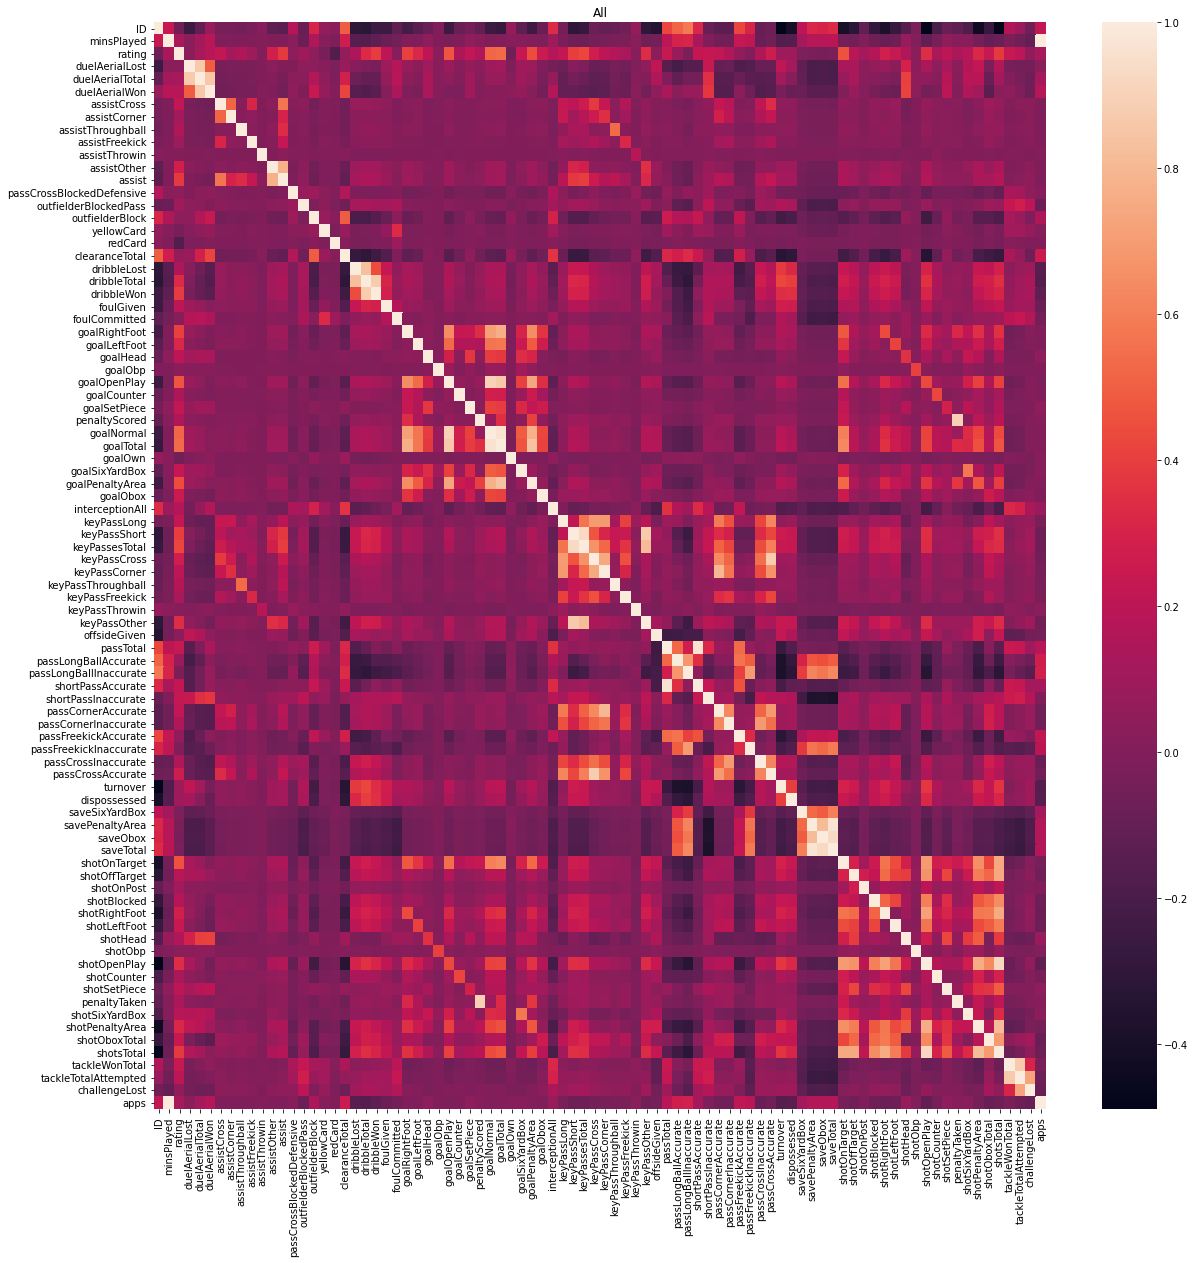

In [ ]:
#heatmap for all data
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(all_data.corr(),annot=False)
plt.title('All')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


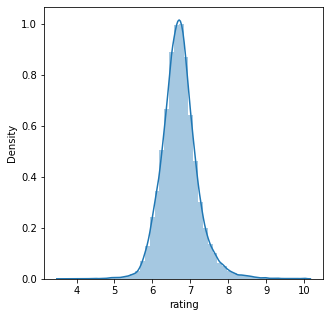

Mean:  6.715274587823266
Median:  6.694444444444444
Standard deviation:  0.4845087132413244
Varience:  0.23474869320676392


In [ ]:
#rating distribution plot for all data
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(all_data['rating'])
plt.show()
print('Mean: ', all_data['rating'].mean())
print('Median: ', all_data['rating'].median())
print('Standard deviation: ', all_data['rating'].std())
print('Varience: ', all_data['rating'].var())

In [ ]:
#calculate 6 features have highest correlation with rating and print them 
correlation = all_data.corr()
column_correlations = correlation.abs().nlargest(7, 'rating')['rating']

for column, correlation in column_correlations.iteritems():
    print(f'Column: {column}, Correlation: {correlation}')

Column: rating, Correlation: 1.0
Column: goalTotal, Correlation: 0.5345469955973674
Column: goalNormal, Correlation: 0.5224324508541105
Column: goalOpenPlay, Correlation: 0.4656327062744845
Column: shotOnTarget, Correlation: 0.46064645279903477
Column: goalPenaltyArea, Correlation: 0.44657307181338174
Column: keyPassesTotal, Correlation: 0.4247185741358423


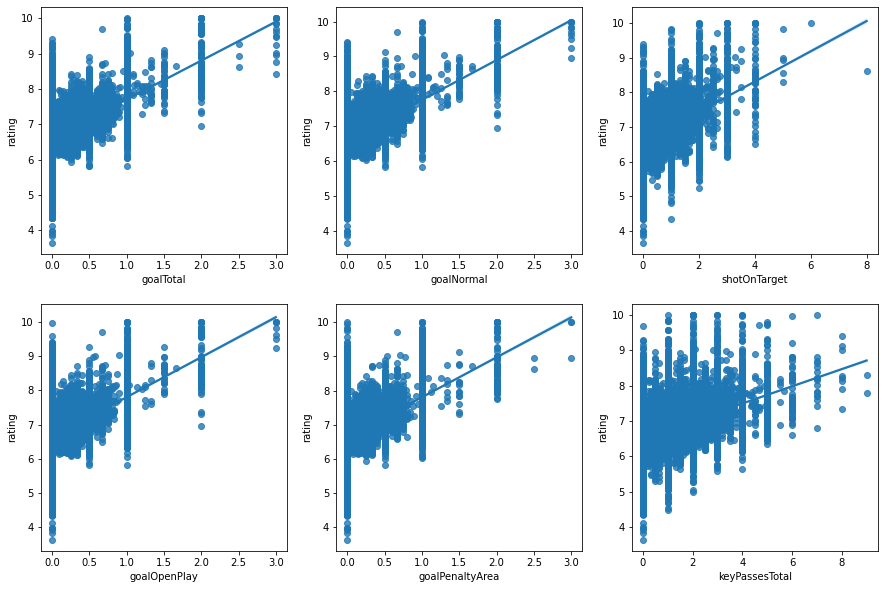

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_data, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_data, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_data, x='shotOnTarget', y='rating')
plt.subplot(234)
sns.regplot(data= all_data, x='goalOpenPlay', y='rating')
plt.subplot(235)
sns.regplot(data= all_data, x='goalPenaltyArea', y='rating')
plt.subplot(236)
sns.regplot(data= all_data, x='keyPassesTotal', y='rating')


##**Each position analyse**

In [ ]:
#split dataframe to 12 group of positions
group_all = all_data.groupby('positionCode', group_keys = False)

group_dict = {key: group for key, group in group_all}
for key, group in group_dict.items():
    if ' ' in key:
        key = '_'.join(key.split(' '))
    exec(f"all_{key} = group")

In [ ]:
dataframes = [all_AMC, all_AML, all_AMR, all_DC, all_DL, all_DMC, all_DR, all_FW, all_GK, all_MC, all_ML, all_MR]
positions = ['AMC', 'AML', 'AMR', 'DC', 'DL', 'DMC', 'DR', 'FW', 'GK', 'MC', 'ML', 'MR']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


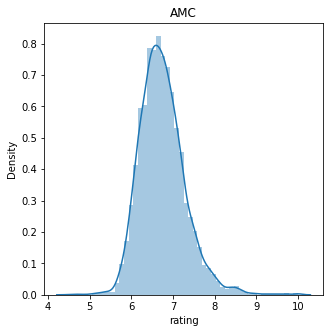

AMC
Mean:  6.746156564220887
Median:  6.69
Standard deviation:  0.5479209037202408
Varience:  0.3002173167336054


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


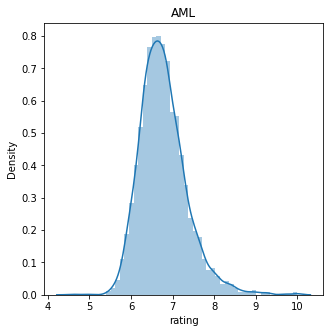

AML
Mean:  6.775646610064576
Median:  6.71
Standard deviation:  0.5663362276292753
Varience:  0.3207367227253583


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


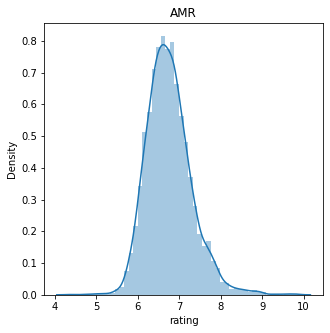

AMR
Mean:  6.757468165668962
Median:  6.705
Standard deviation:  0.5479613902469492
Varience:  0.30026168520136937


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


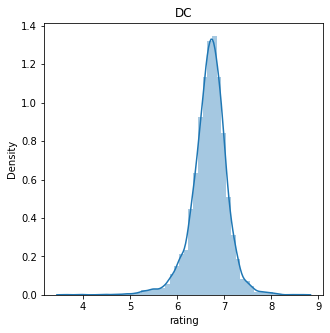

DC
Mean:  6.68170851375135
Median:  6.71
Standard deviation:  0.3780035269072104
Varience:  0.14288666635429015


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


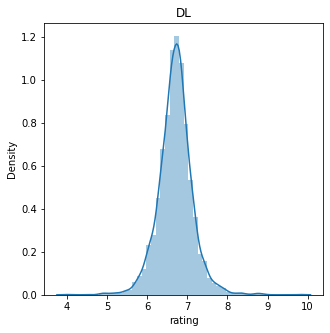

DL
Mean:  6.702422599004664
Median:  6.71
Standard deviation:  0.42830267946326456
Varience:  0.18344318523541195


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


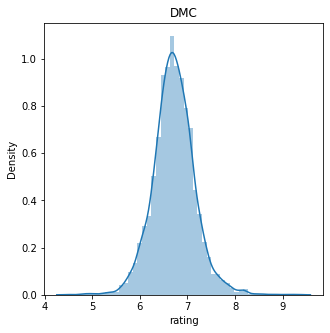

DMC
Mean:  6.716489103373296
Median:  6.71
Standard deviation:  0.4391994384612674
Varience:  0.1928961467446926


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


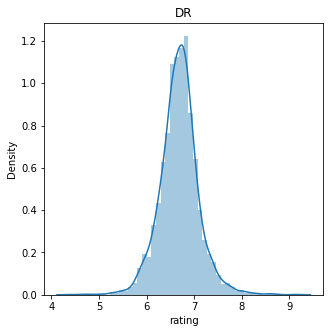

DR
Mean:  6.68439696203815
Median:  6.69
Standard deviation:  0.41081998271494885
Varience:  0.16877305819791089


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


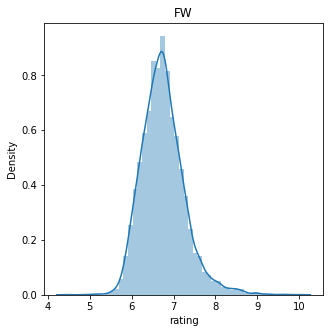

FW
Mean:  6.749460881383256
Median:  6.7125
Standard deviation:  0.5151499862436099
Varience:  0.26537950832679147


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


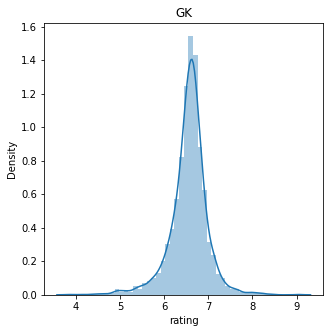

GK
Mean:  6.559672001475934
Median:  6.599565217391305
Standard deviation:  0.42910774745474806
Varience:  0.18413345892568786


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


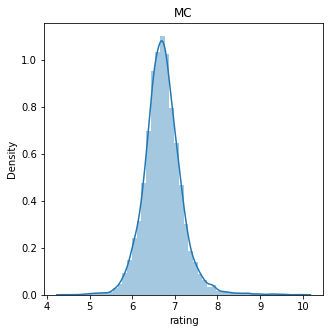

MC
Mean:  6.716713351974833
Median:  6.697999999999999
Standard deviation:  0.4463238157914855
Varience:  0.1992049485426719


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


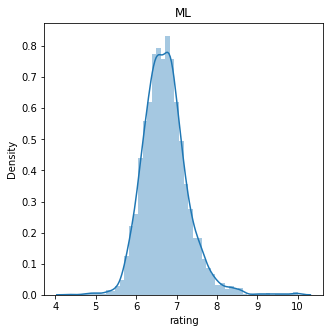

ML
Mean:  6.715402878713437
Median:  6.686666666666667
Standard deviation:  0.5481324767909137
Varience:  0.3004492121129415


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


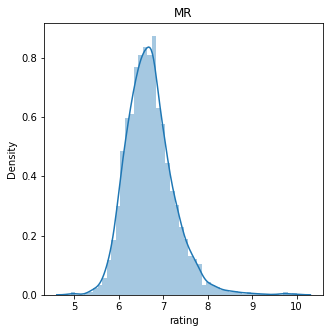

MR
Mean:  6.702796991505031
Median:  6.66
Standard deviation:  0.535400551805164
Varience:  0.28665375087327405


In [ ]:
# distribution plot of rating for each position dataframe
for df, position in zip(dataframes, positions):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.distplot(df['rating'])
    plt.title(position)
    plt.show()
    print(position)
    print('Mean: ', df['rating'].mean())
    print('Median: ', df['rating'].median())
    print('Standard deviation: ', df['rating'].std())
    print('Varience: ', df['rating'].var())


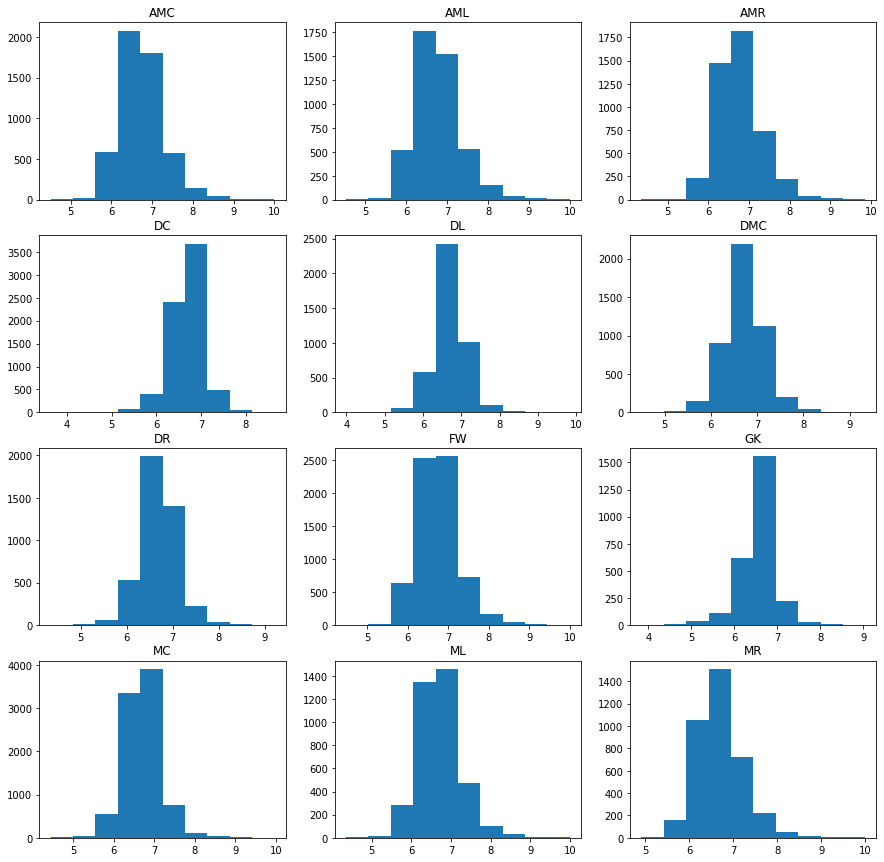

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
ax = ax.ravel()

# histogram of rating for each position dataframe
for i, (df,position) in enumerate(zip(dataframes, positions)):
    ax[i].hist(df['rating'])
    ax[i].set_title(f'{position}')

plt.show()

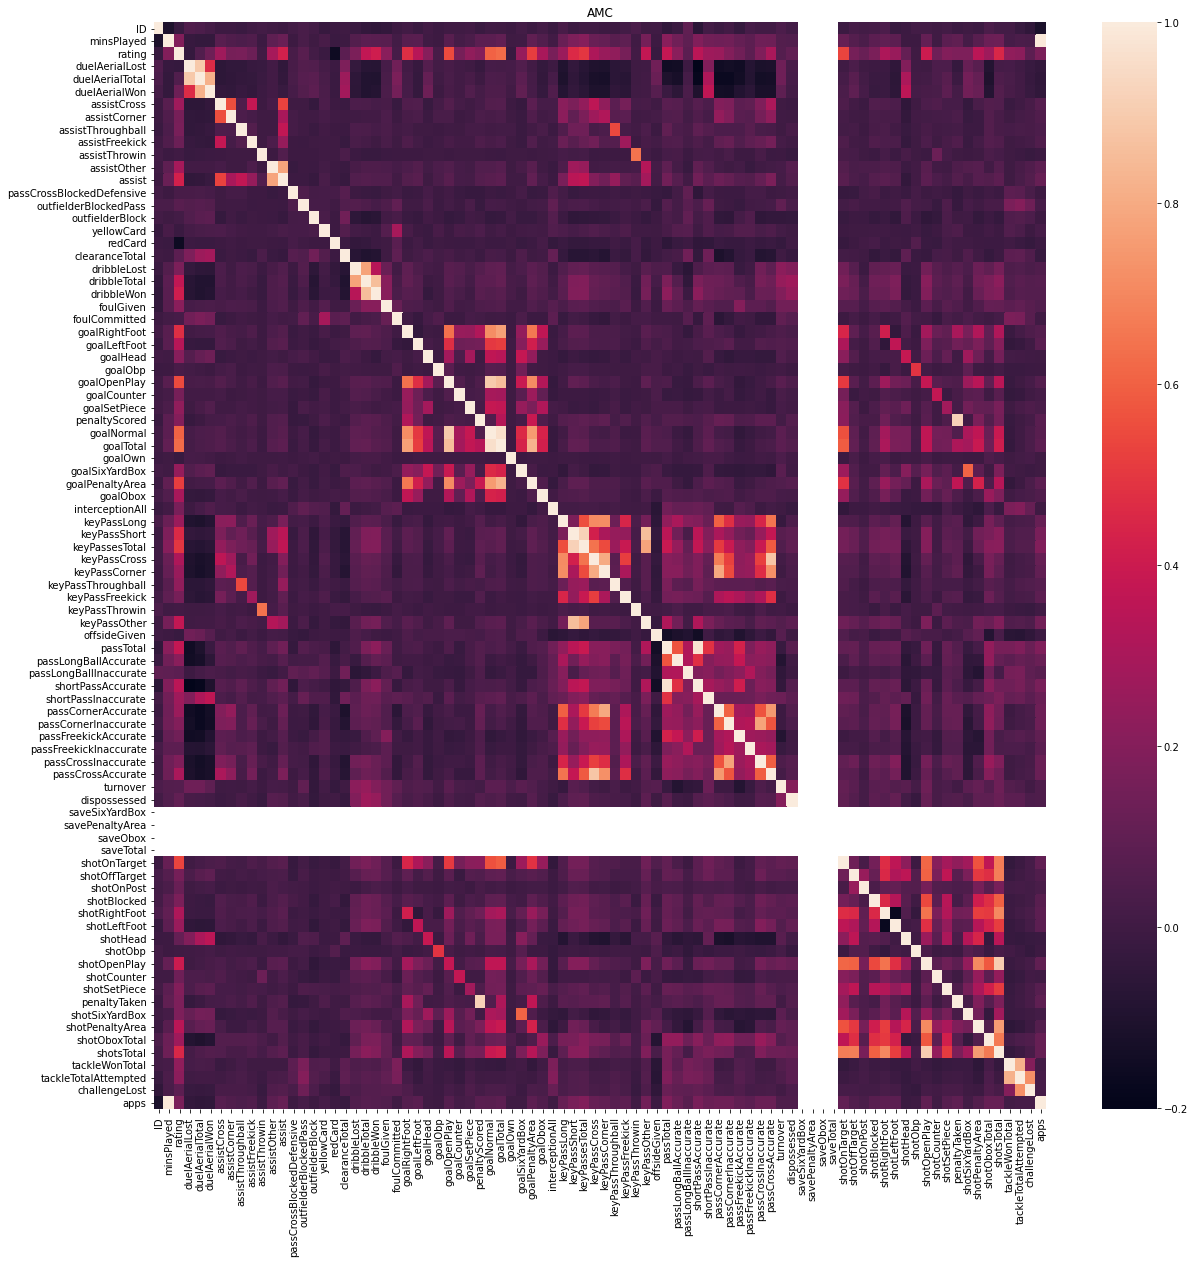

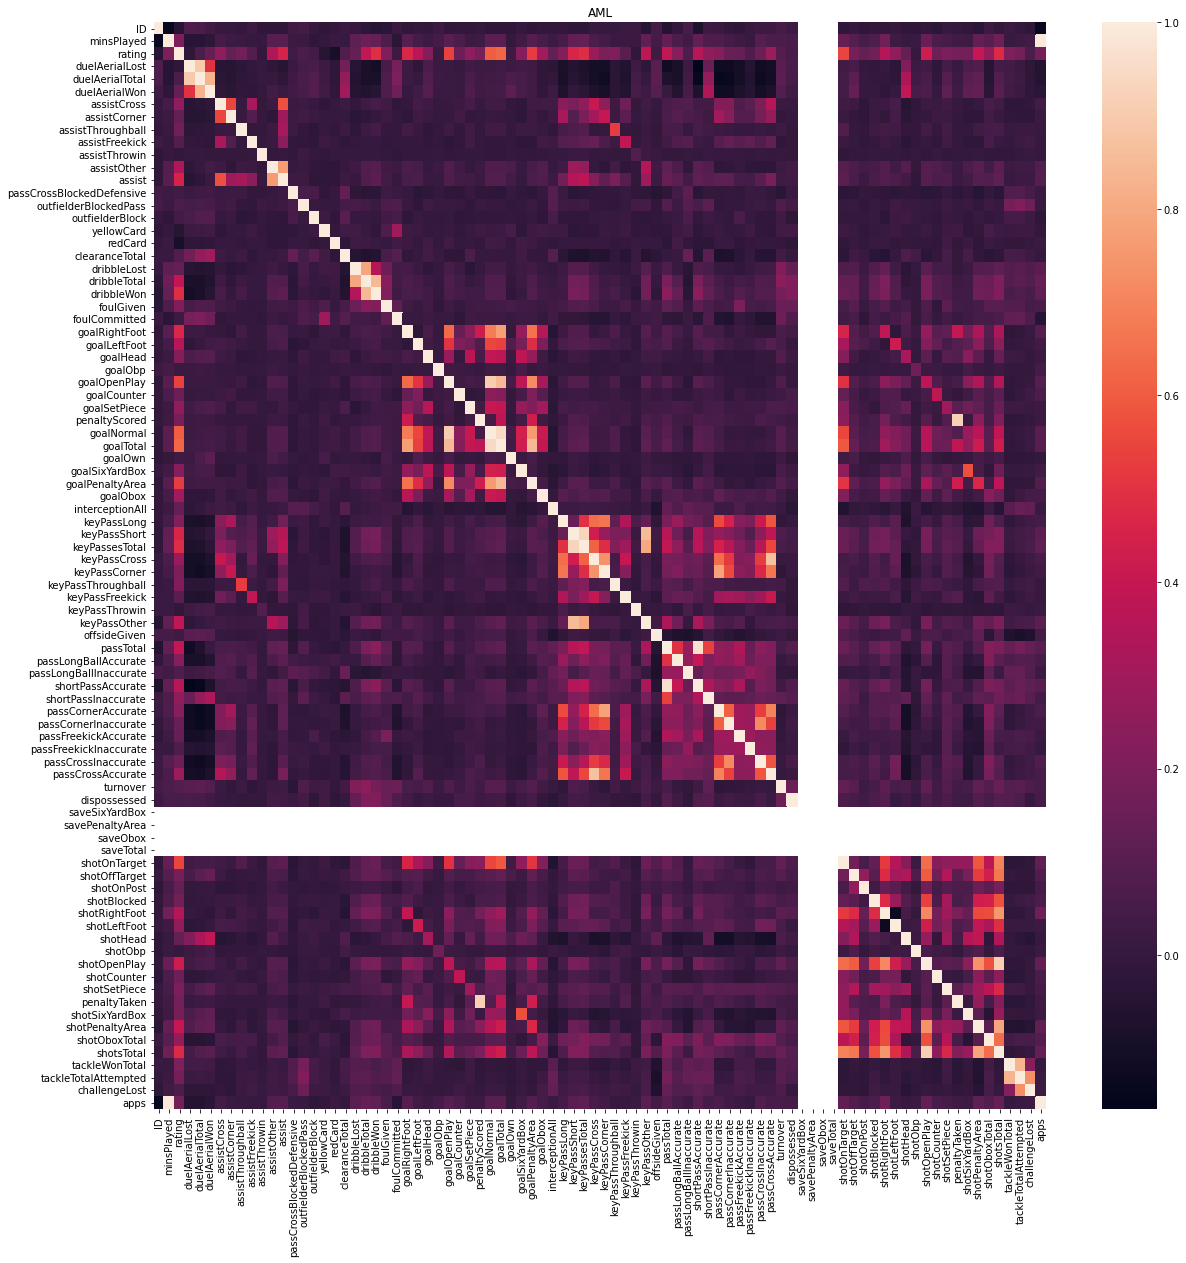

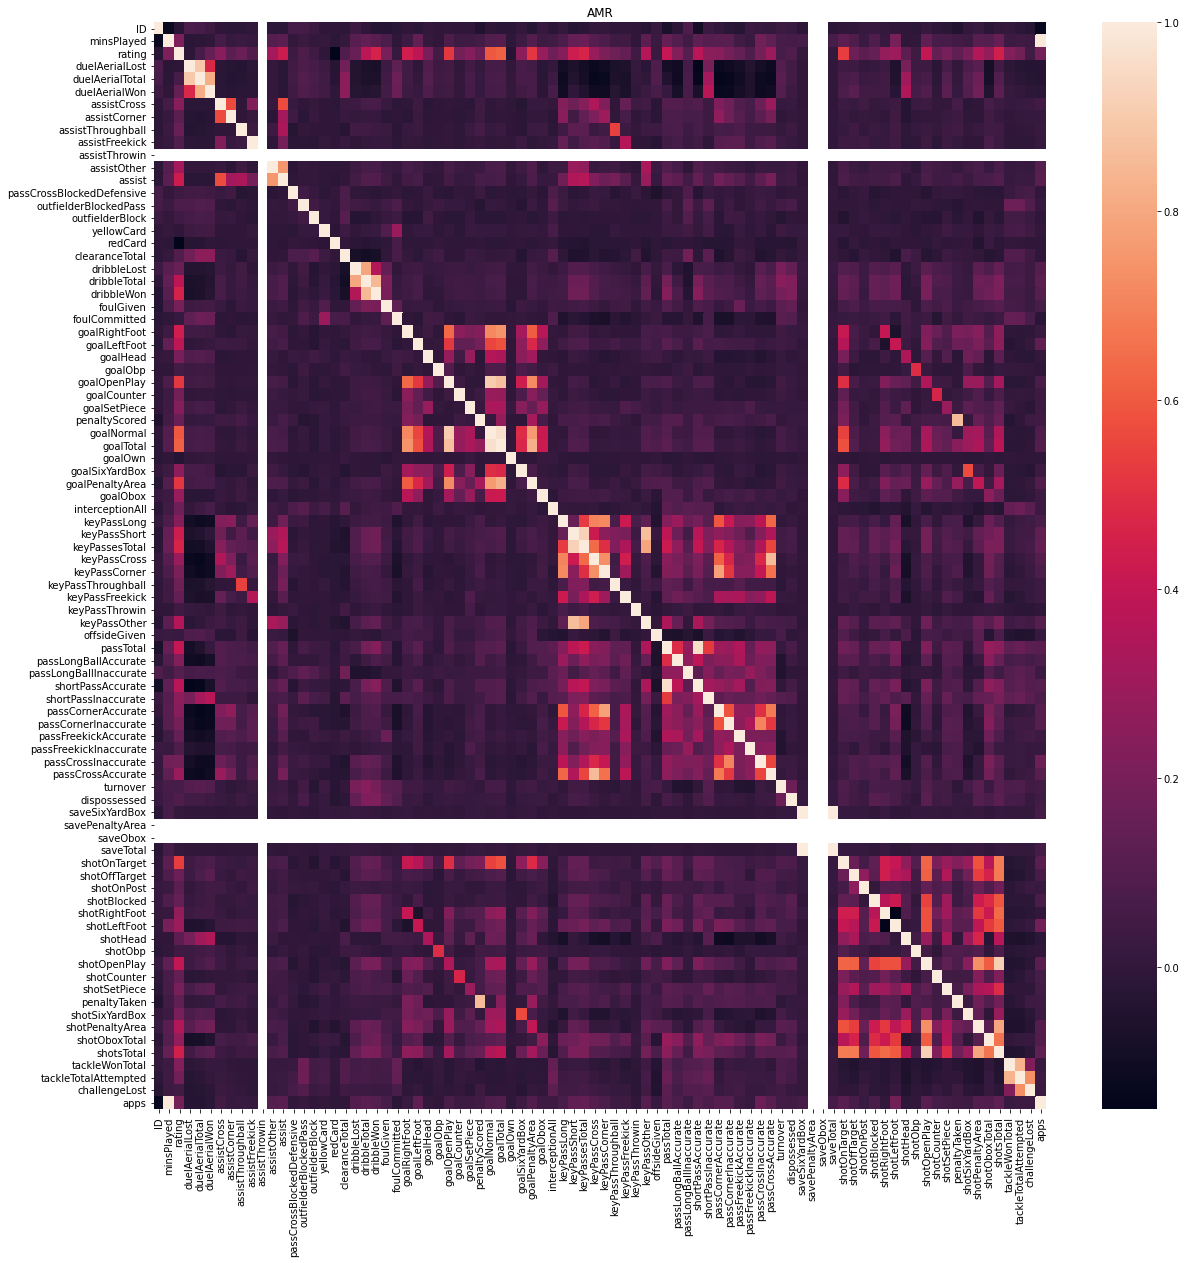

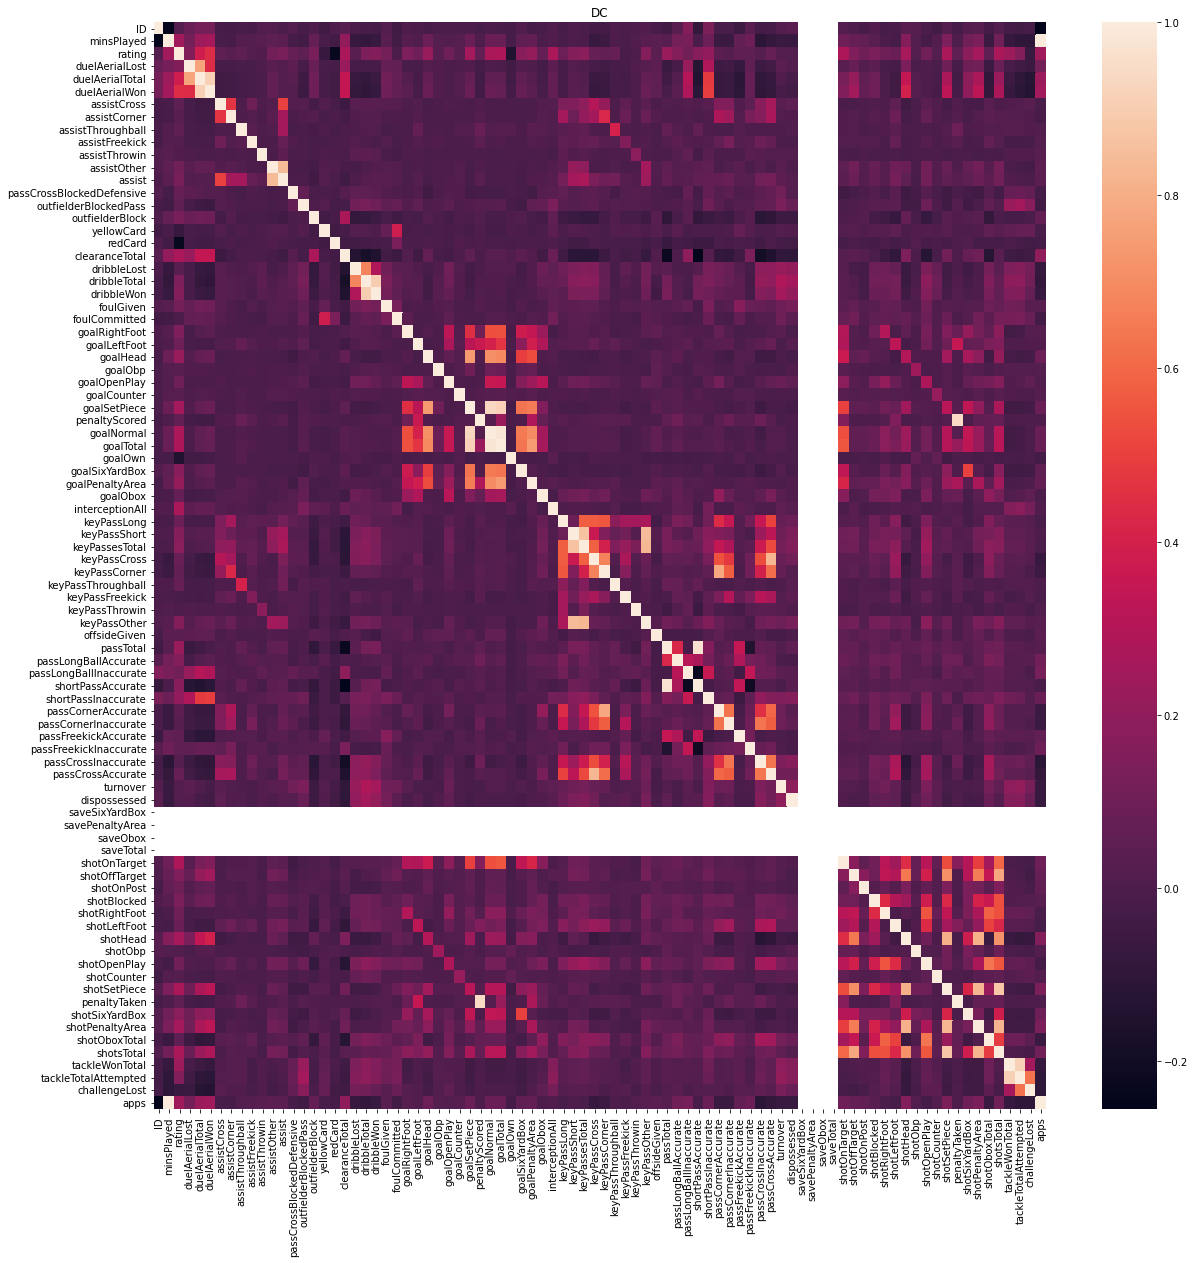

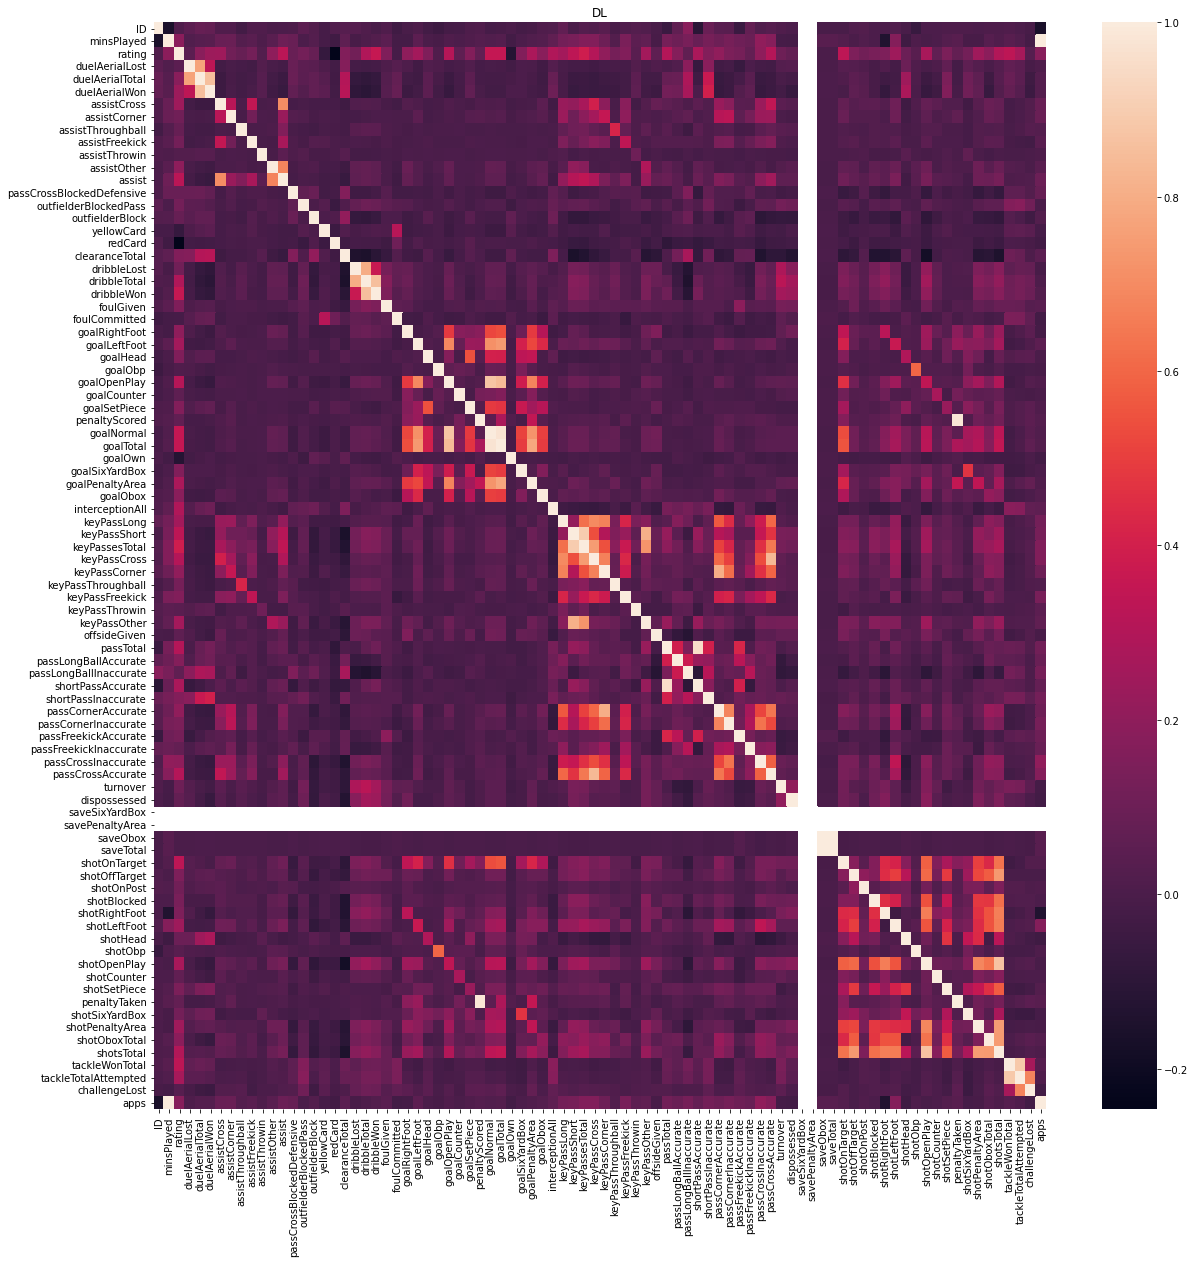

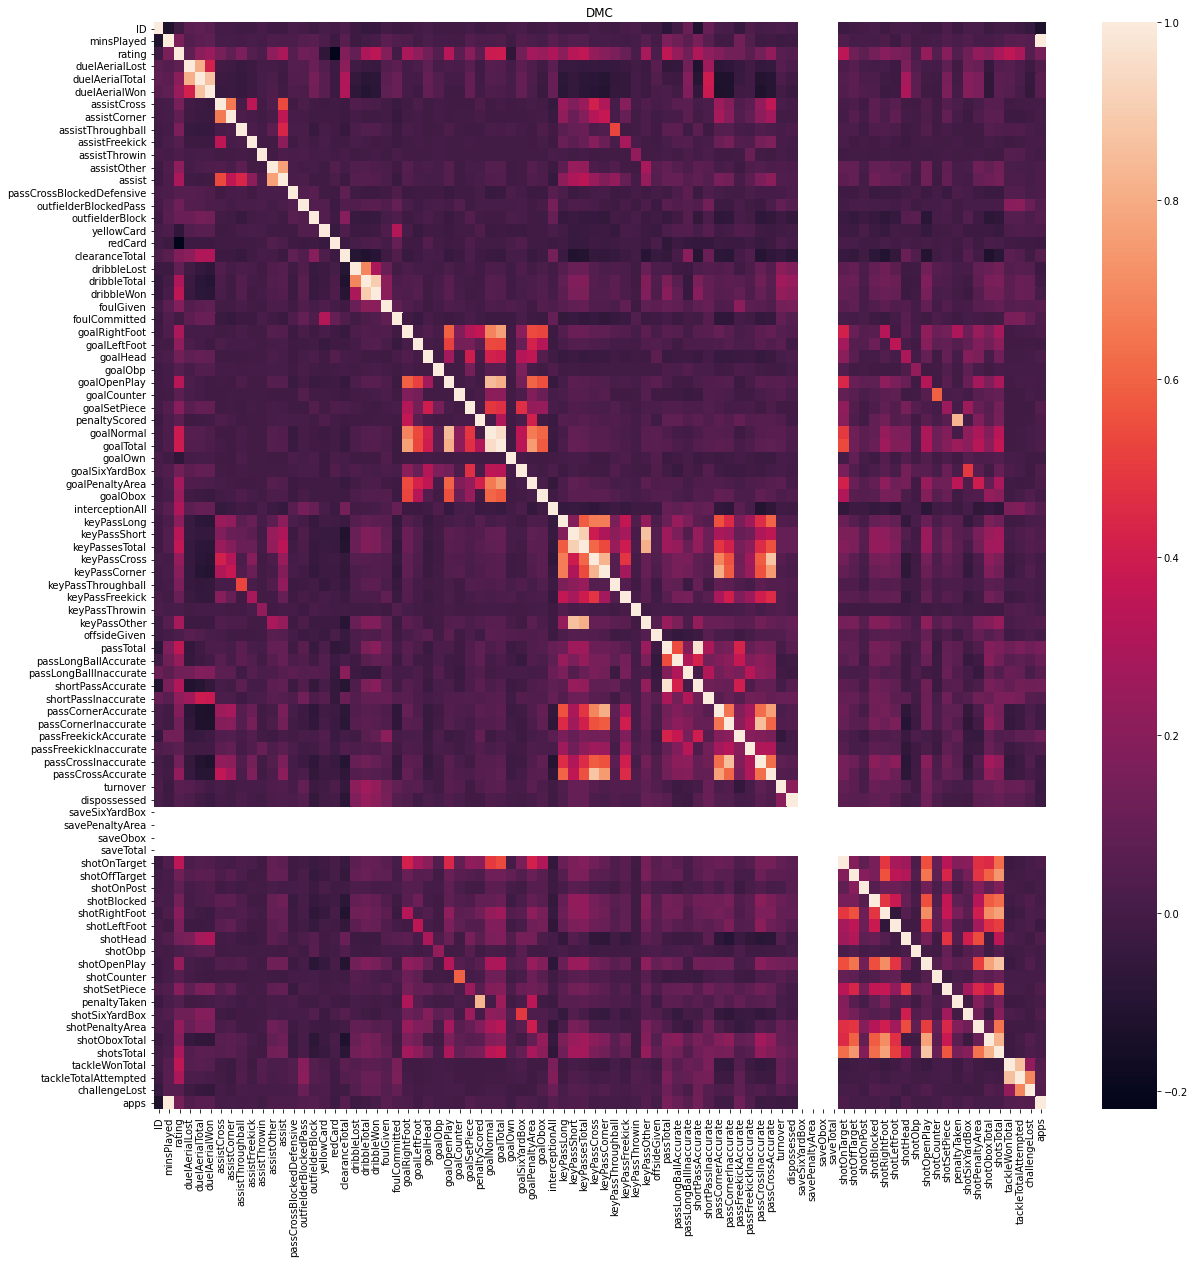

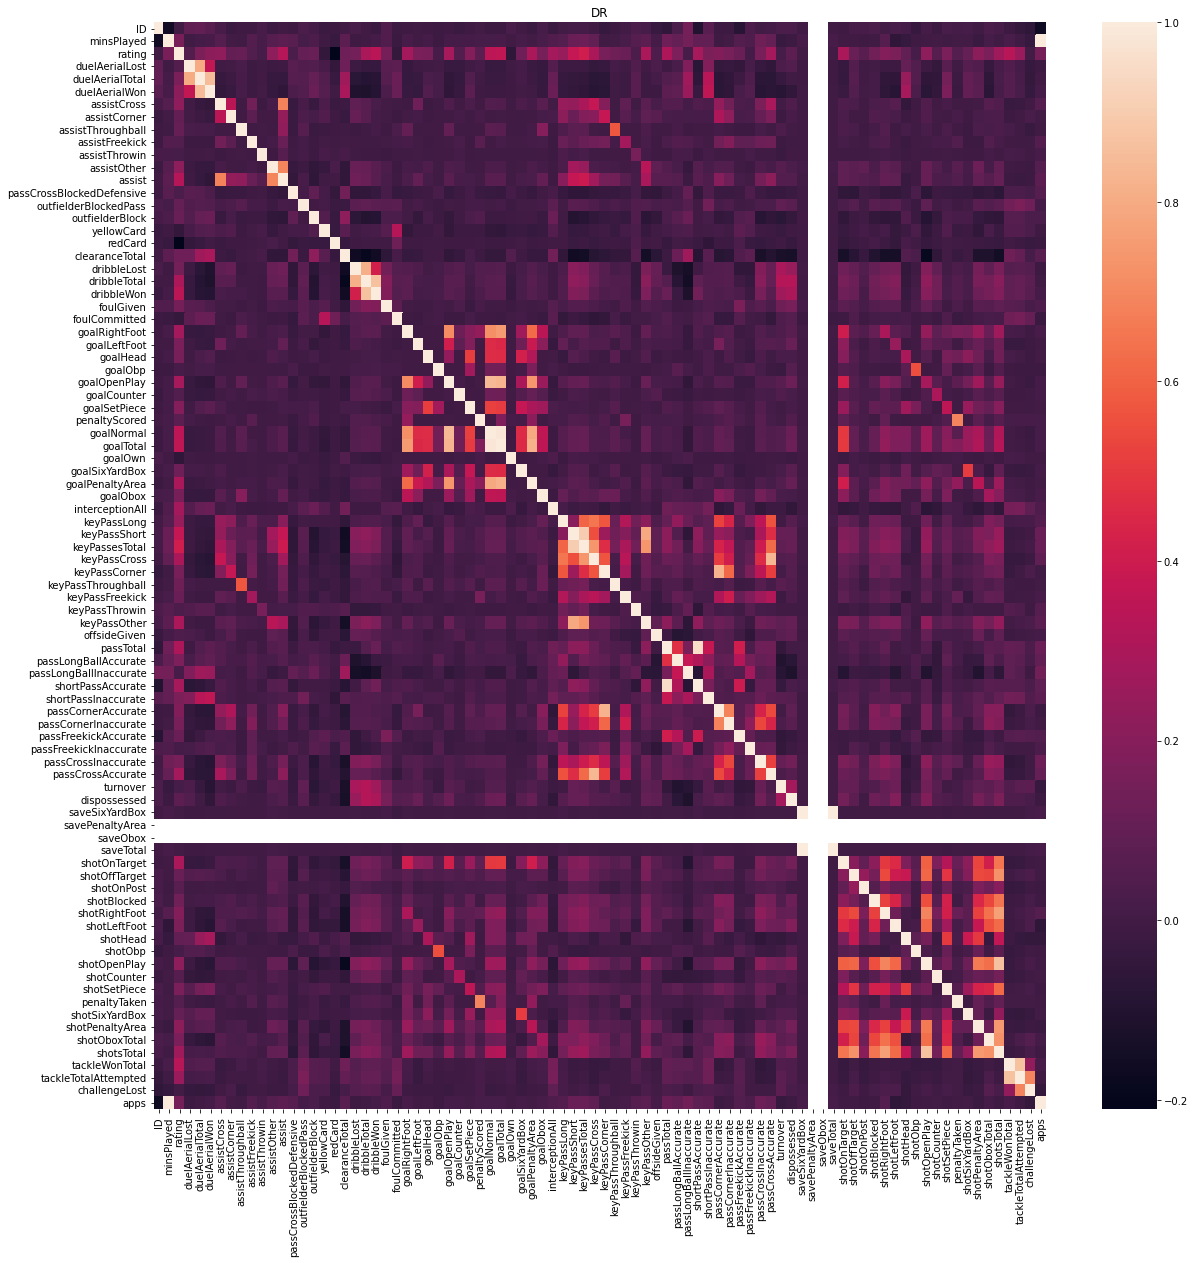

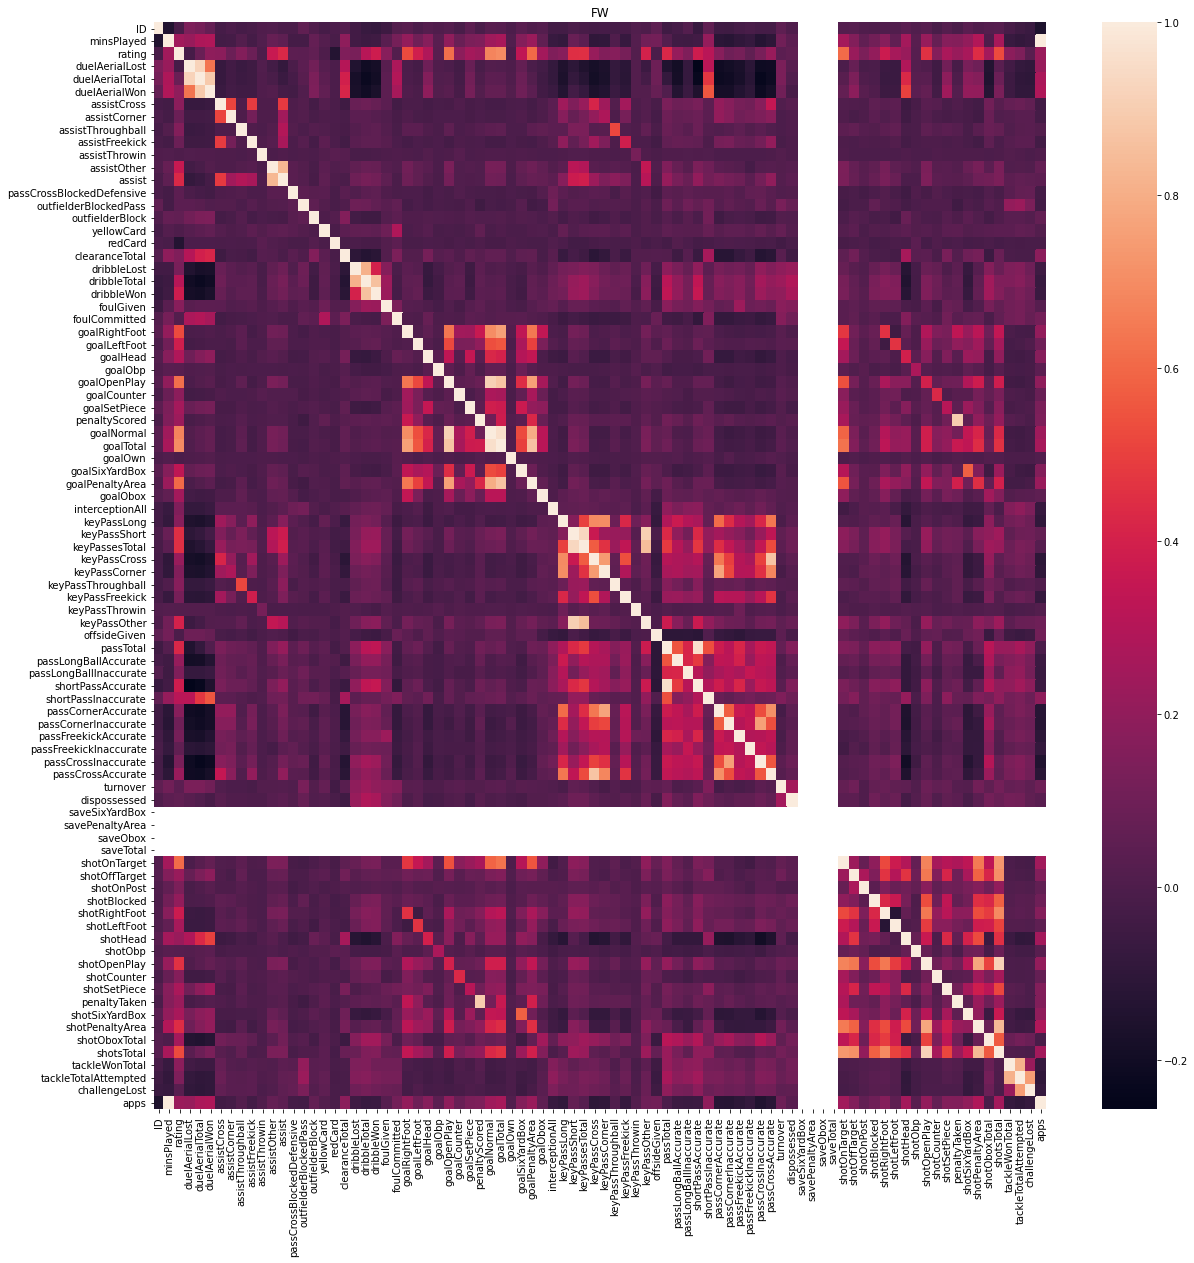

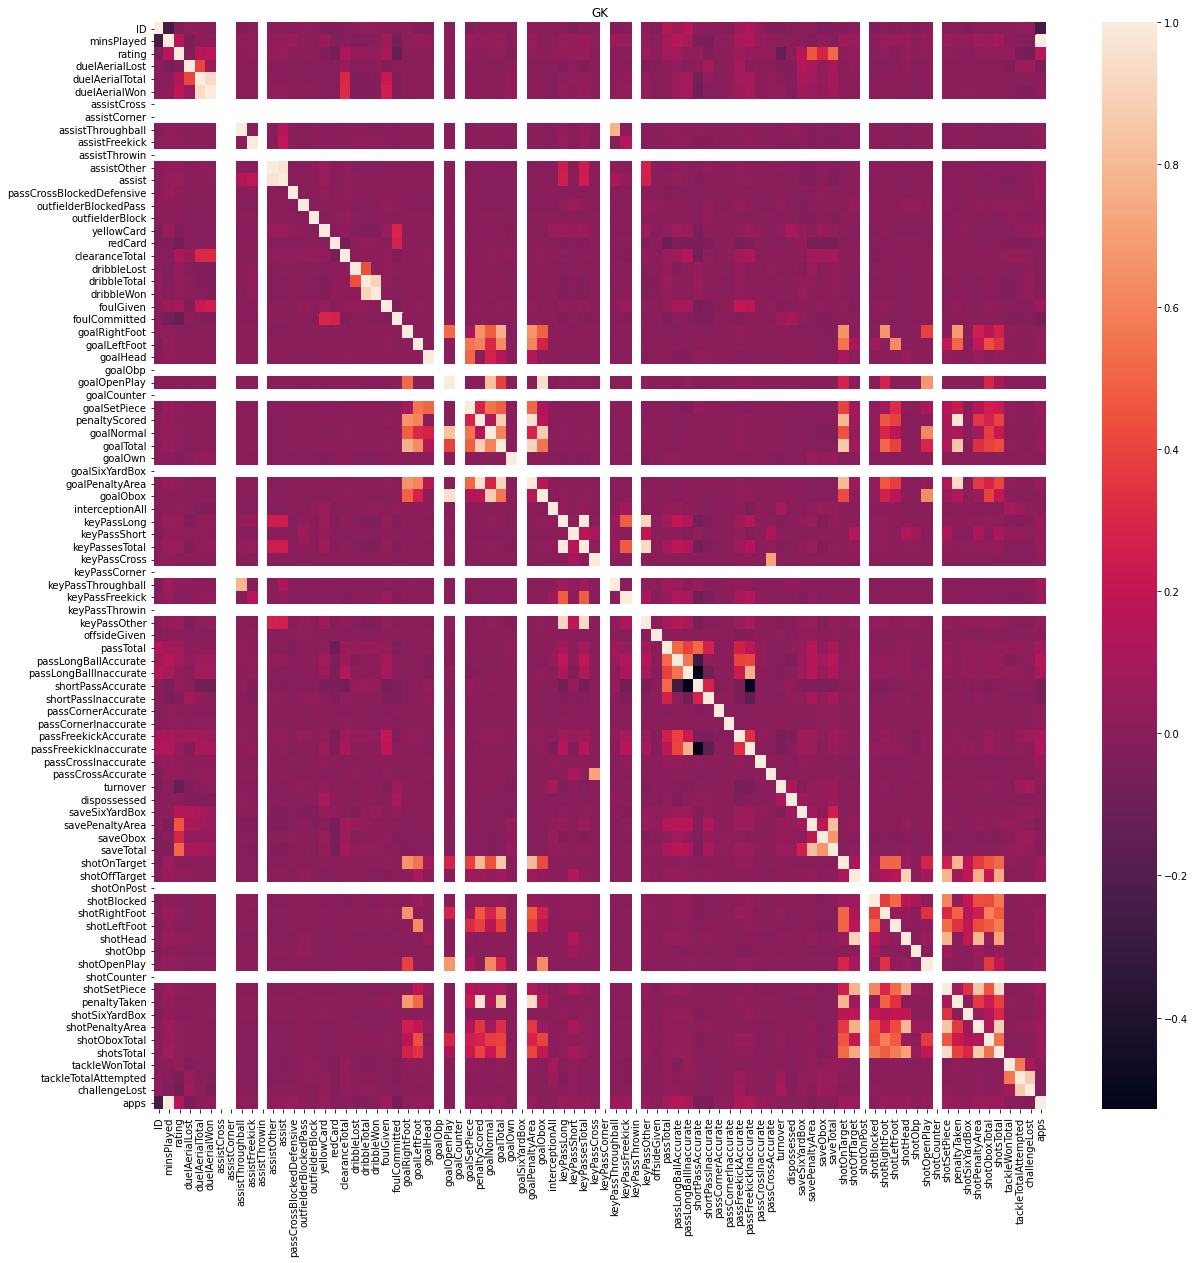

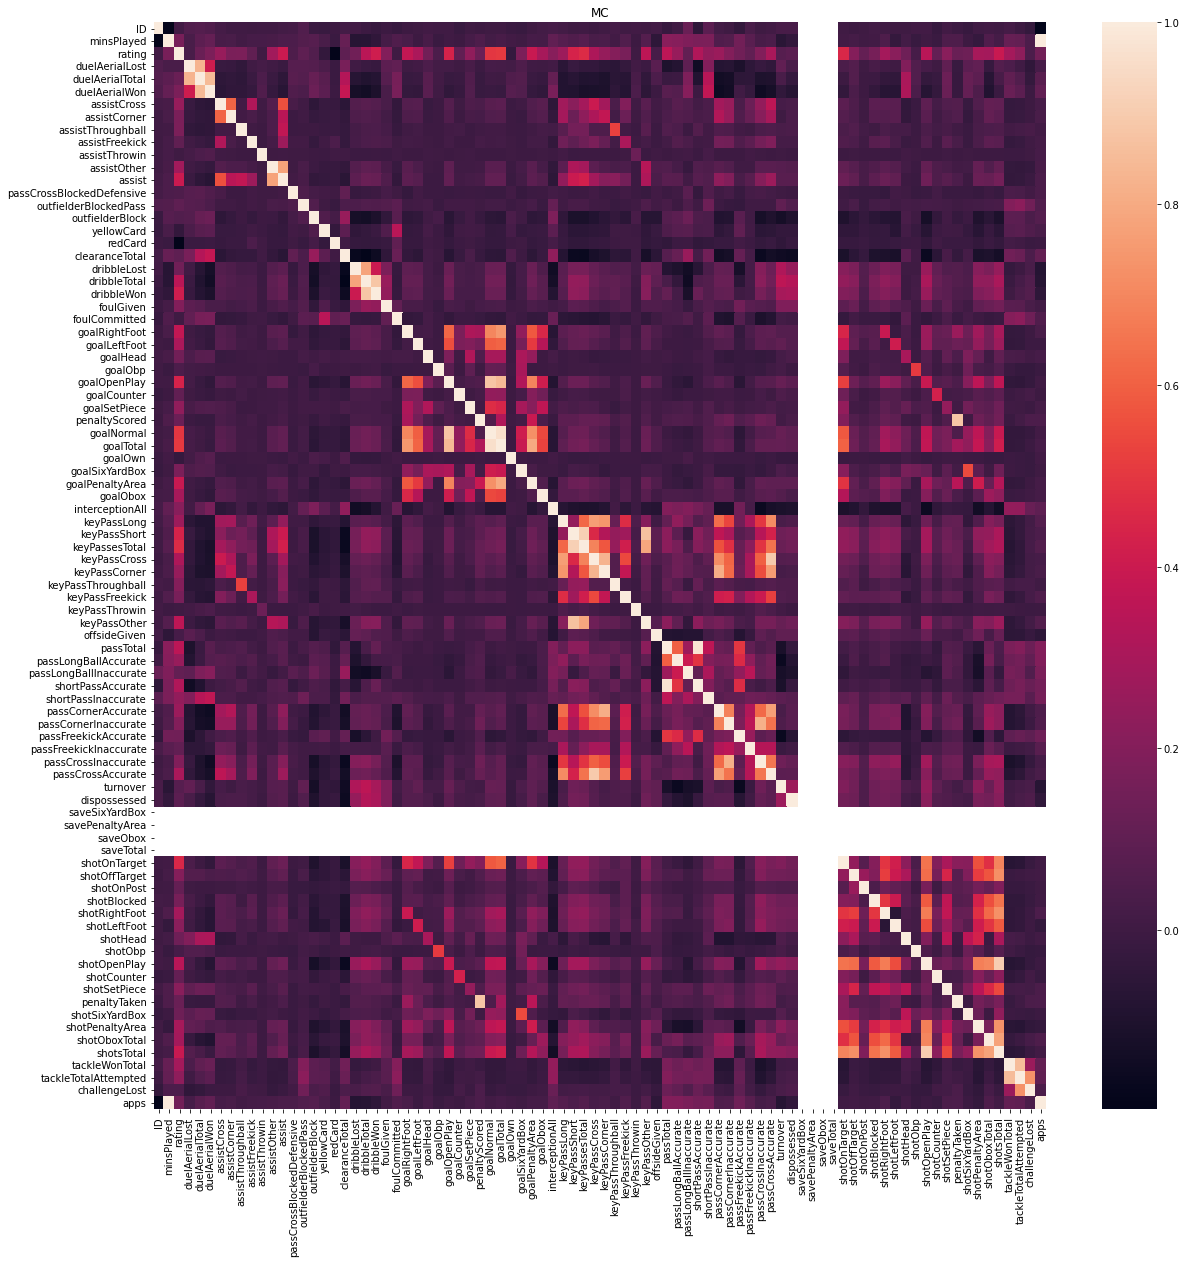

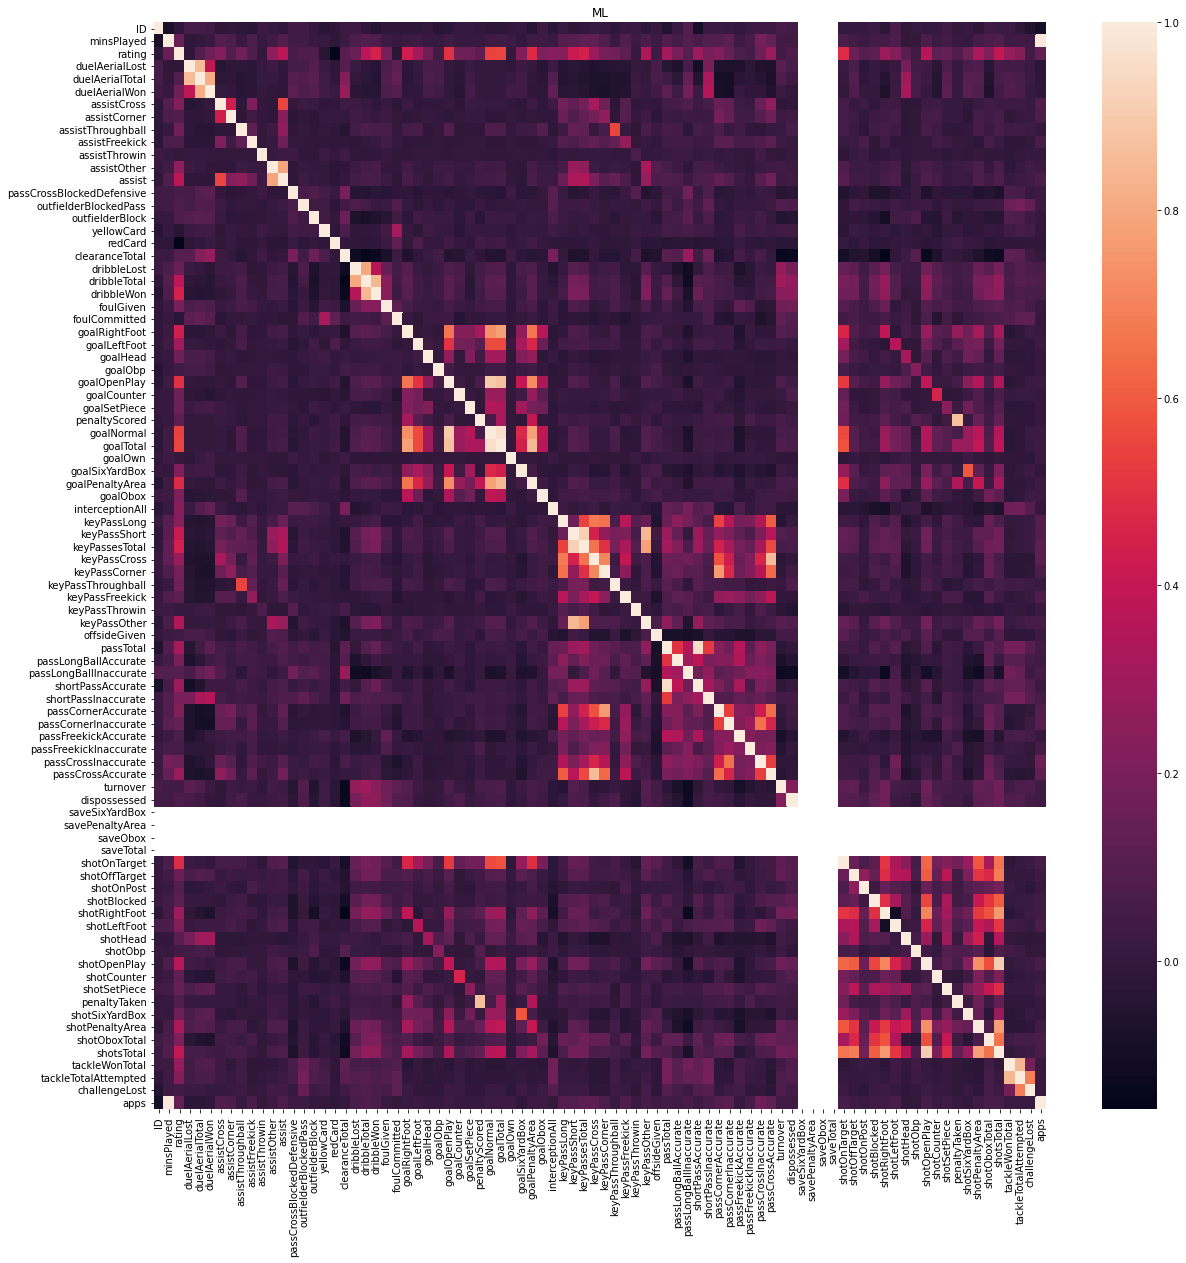

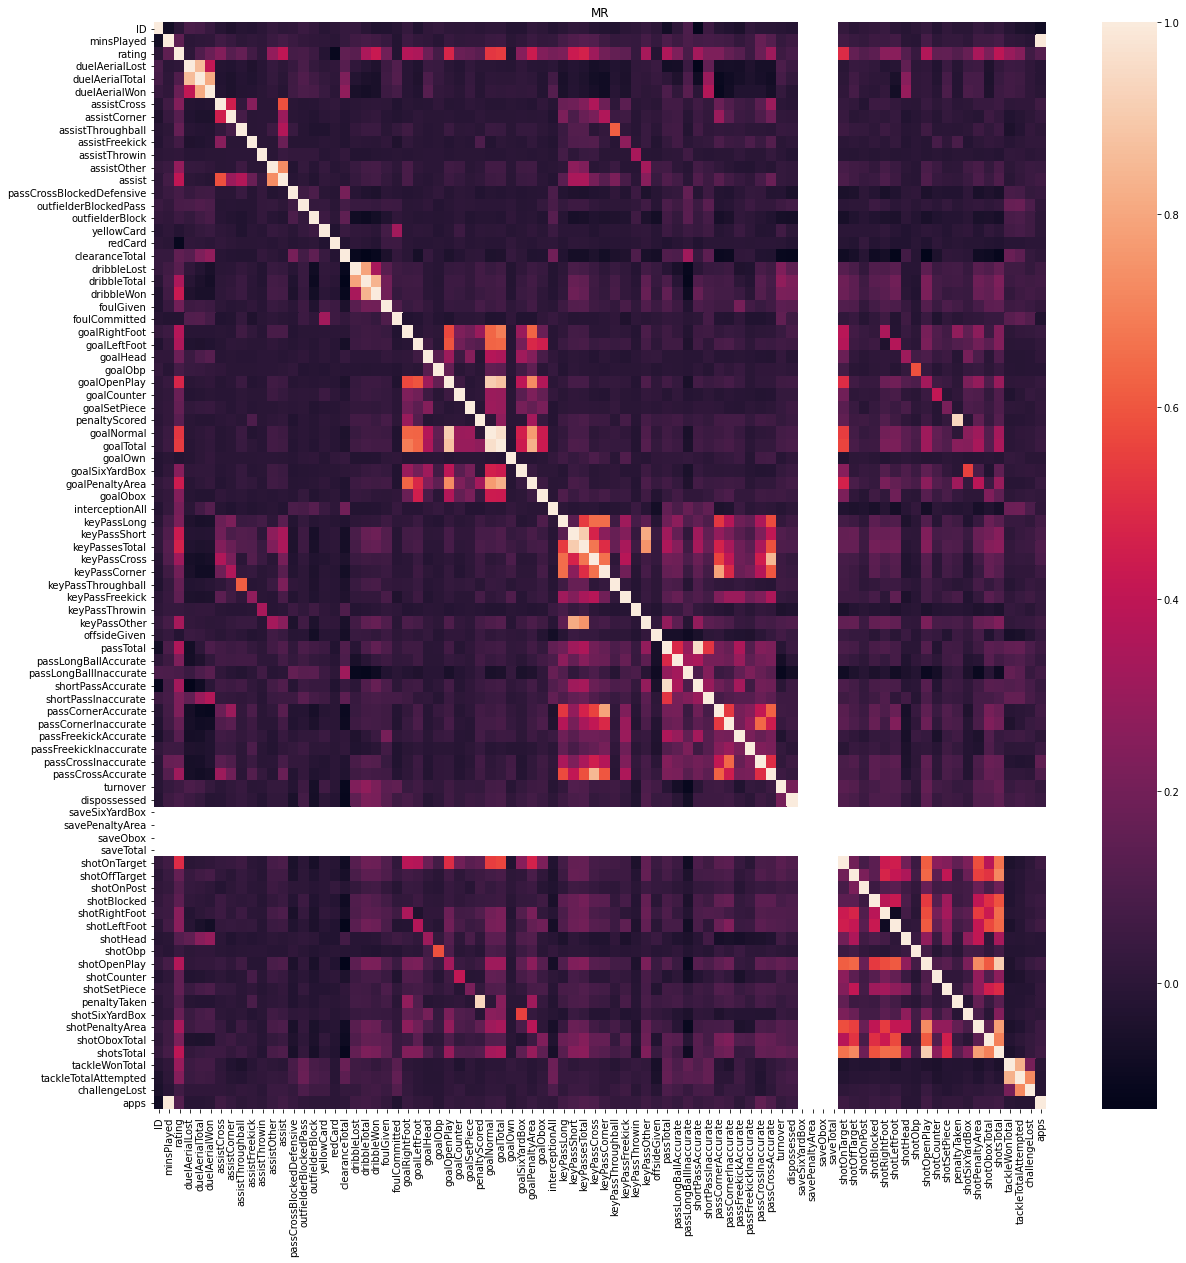

In [ ]:
#heatmap for each position dataframe
for df, name in zip(dataframes,positions):
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(df.corr(),annot=False)
    plt.title(name)
plt.show()

In [ ]:
#calculate 6 features have highest correlation with rating and print them 
for df, position in zip(dataframes, positions):
    correlation = df.corr()
    column_correlations = correlation.abs().nlargest(7, 'rating')['rating']
    print(position)
    for column, correlation in column_correlations.iteritems():
        print(f'Column: {column}, Correlation: {correlation}')

AMC
Column: rating, Correlation: 1.0
Column: goalTotal, Correlation: 0.626393374314611
Column: goalNormal, Correlation: 0.603823396654087
Column: goalOpenPlay, Correlation: 0.5449033523120758
Column: shotOnTarget, Correlation: 0.534066437600805
Column: goalPenaltyArea, Correlation: 0.5122242204405356
Column: keyPassesTotal, Correlation: 0.49547744644538977
AML
Column: rating, Correlation: 1.0
Column: goalTotal, Correlation: 0.6256831540360804
Column: goalNormal, Correlation: 0.6067654014409949
Column: shotOnTarget, Correlation: 0.5462221180528504
Column: goalOpenPlay, Correlation: 0.5433712250872916
Column: goalPenaltyArea, Correlation: 0.5226714603486183
Column: dribbleWon, Correlation: 0.4858741471952458
AMR
Column: rating, Correlation: 1.0
Column: goalTotal, Correlation: 0.6159726199434055
Column: goalNormal, Correlation: 0.5957226897453143
Column: shotOnTarget, Correlation: 0.5356686652238624
Column: goalOpenPlay, Correlation: 0.5211158959849719
Column: goalPenaltyArea, Correlation

**AMC**

In [ ]:
# AMC
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.626393374314611
# Column: goalNormal, Correlation: 0.603823396654087
# Column: goalOpenPlay, Correlation: 0.5449033523120758
# Column: shotOnTarget, Correlation: 0.534066437600805
# Column: goalPenaltyArea, Correlation: 0.5122242204405356
# Column: keyPassesTotal, Correlation: 0.49547744644538977

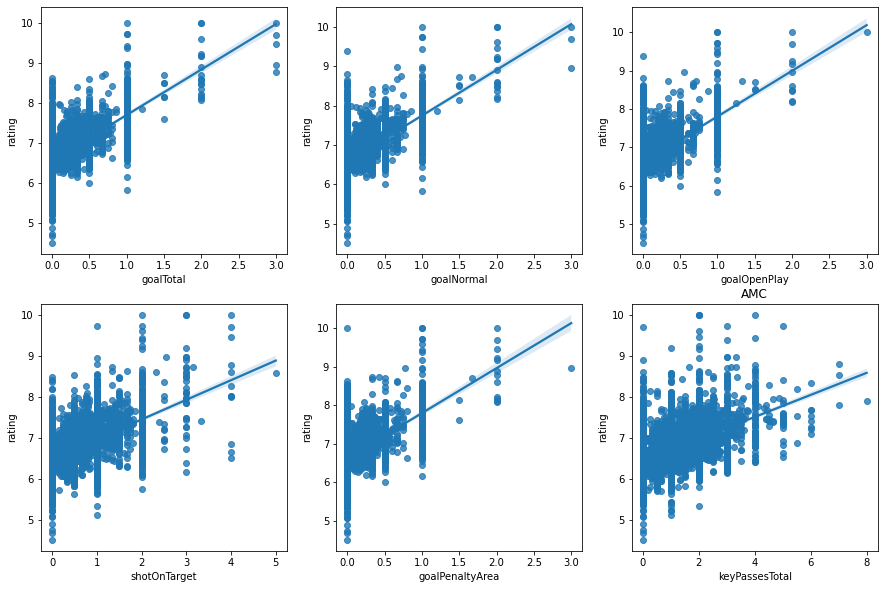

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_AMC, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_AMC, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_AMC, x='goalOpenPlay', y='rating')
plt.subplot(234)
sns.regplot(data= all_AMC, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_AMC, x='goalPenaltyArea', y='rating')
plt.subplot(236)
sns.regplot(data= all_AMC, x='keyPassesTotal', y='rating')
plt.title('AMC')
plt.show()

**AML**

In [ ]:
# AML
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.6256831540360804
# Column: goalNormal, Correlation: 0.6067654014409949
# Column: shotOnTarget, Correlation: 0.5462221180528504
# Column: goalOpenPlay, Correlation: 0.5433712250872916
# Column: goalPenaltyArea, Correlation: 0.5226714603486183
# Column: dribbleWon, Correlation: 0.4858741471952458

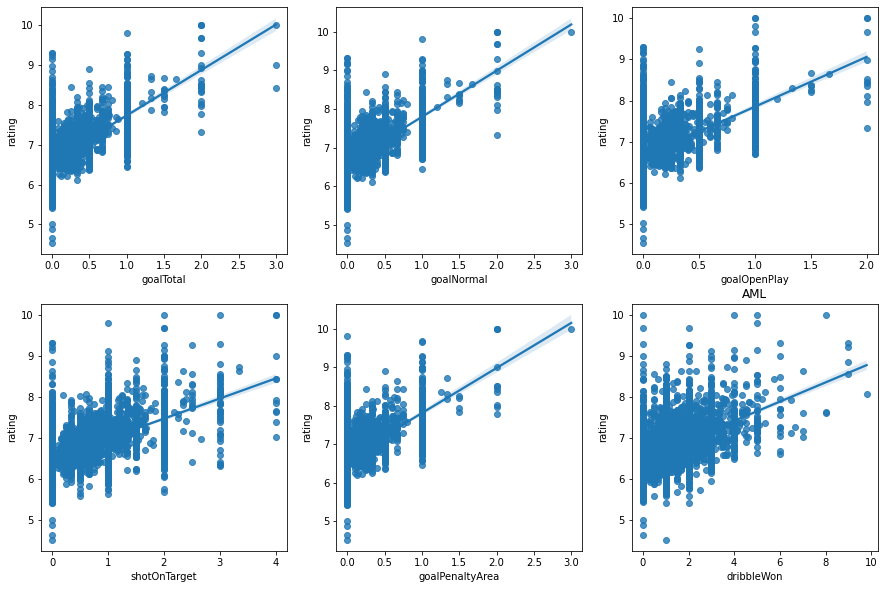

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_AML, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_AML, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_AML, x='goalOpenPlay', y='rating')
plt.subplot(234)
sns.regplot(data= all_AML, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_AML, x='goalPenaltyArea', y='rating')
plt.subplot(236)
sns.regplot(data= all_AML, x='dribbleWon', y='rating')
plt.title('AML')
plt.show()

**AMR**

In [ ]:
# AMR
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.6159726199434055
# Column: goalNormal, Correlation: 0.5957226897453143
# Column: shotOnTarget, Correlation: 0.5356686652238624
# Column: goalOpenPlay, Correlation: 0.5211158959849719
# Column: goalPenaltyArea, Correlation: 0.5145756415232643
# Column: keyPassesTotal, Correlation: 0.46286015985338974

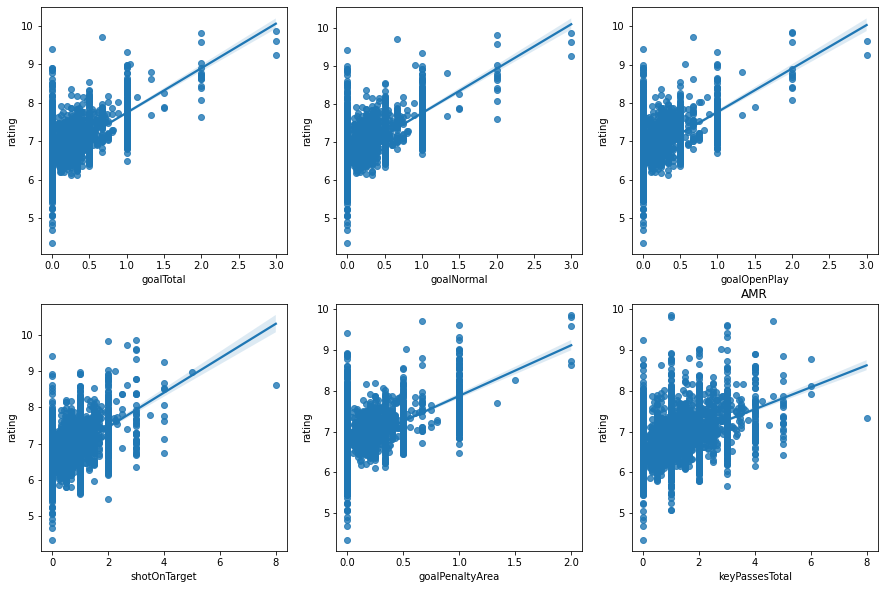

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_AMR, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_AMR, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_AMR, x='goalOpenPlay', y='rating')
plt.subplot(234)
sns.regplot(data= all_AMR, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_AMR, x='goalPenaltyArea', y='rating')
plt.subplot(236)
sns.regplot(data= all_AMR, x='keyPassesTotal', y='rating')
plt.title('AMR')
plt.show()

**DC**

In [ ]:
# DC
# Column: rating, Correlation: 1.0
# Column: duelAerialWon, Correlation: 0.4415199498278561
# Column: duelAerialTotal, Correlation: 0.3819269120865793
# Column: goalTotal, Correlation: 0.27974830249840493
# Column: shotOnTarget, Correlation: 0.27890483482925915
# Column: shotsTotal, Correlation: 0.2776259413481635
# Column: goalNormal, Correlation: 0.274841339456656

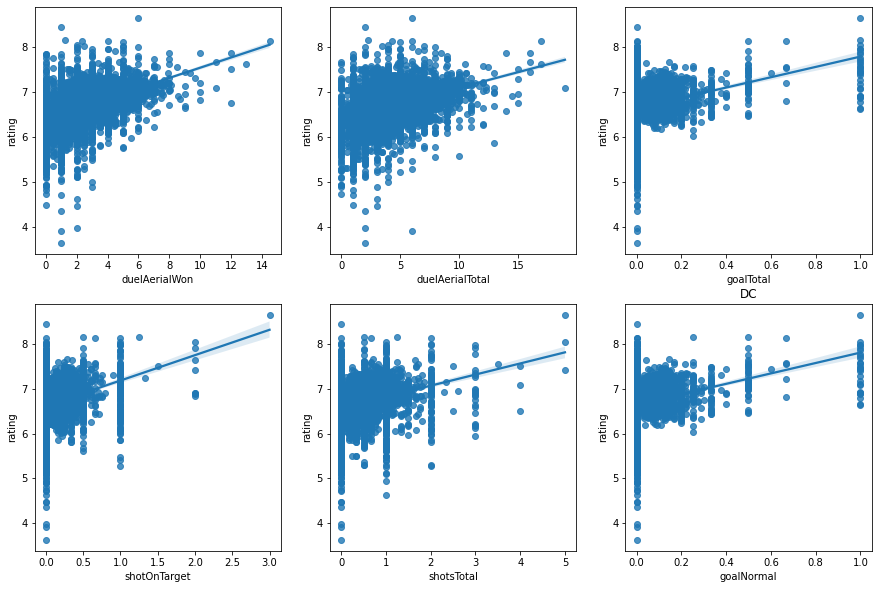

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_DC, x='duelAerialWon', y='rating')
plt.subplot(232)
sns.regplot(data= all_DC, x='duelAerialTotal', y='rating')
plt.subplot(233)
sns.regplot(data= all_DC, x='goalTotal', y='rating')
plt.subplot(234)
sns.regplot(data= all_DC, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_DC, x='shotsTotal', y='rating')
plt.subplot(236)
sns.regplot(data= all_DC, x='goalNormal', y='rating')
plt.title('DC')
plt.show()

**DL**

In [ ]:
# DL
# Column: rating, Correlation: 1.0
# Column: keyPassesTotal, Correlation: 0.3868041632159168
# Column: dribbleWon, Correlation: 0.35800624444055545
# Column: goalTotal, Correlation: 0.3568507664721342
# Column: goalNormal, Correlation: 0.3553979407586394
# Column: shotOnTarget, Correlation: 0.3375652240021503
# Column: keyPassShort, Correlation: 0.33678724391303255

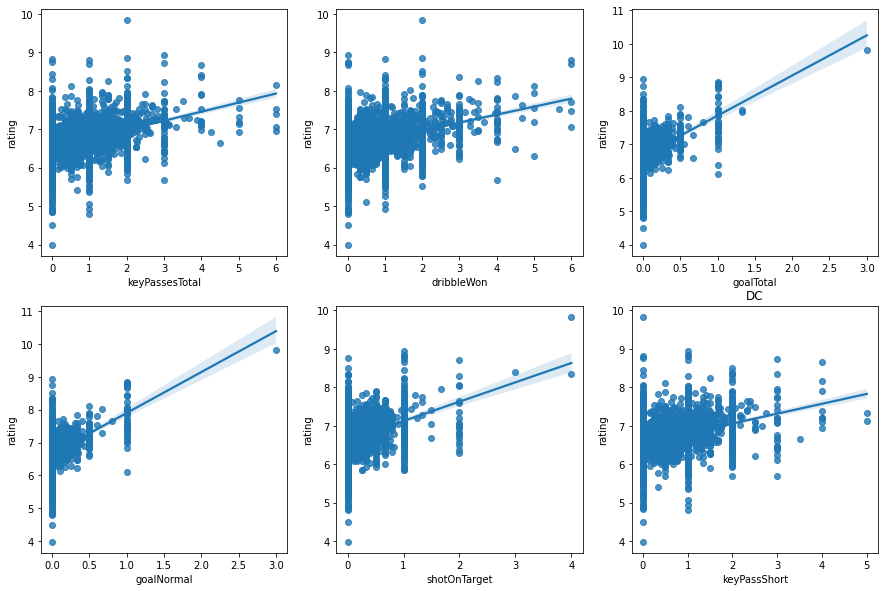

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_DL, x='keyPassesTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_DL, x='dribbleWon', y='rating')
plt.subplot(233)
sns.regplot(data= all_DL, x='goalTotal', y='rating')
plt.subplot(234)
sns.regplot(data= all_DL, x='goalNormal', y='rating')
plt.subplot(235)
sns.regplot(data= all_DL, x='shotOnTarget', y='rating')
plt.subplot(236)
sns.regplot(data= all_DL, x='keyPassShort', y='rating')
plt.title('DC')
plt.show()

**DMC**

In [ ]:
# DMC
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.3917108678458548
# Column: goalNormal, Correlation: 0.38821578419390695
# Column: keyPassesTotal, Correlation: 0.3611172141905684
# Column: tackleWonTotal, Correlation: 0.3563278883089567
# Column: passTotal, Correlation: 0.35222731830254267
# Column: dribbleWon, Correlation: 0.34709118007713285

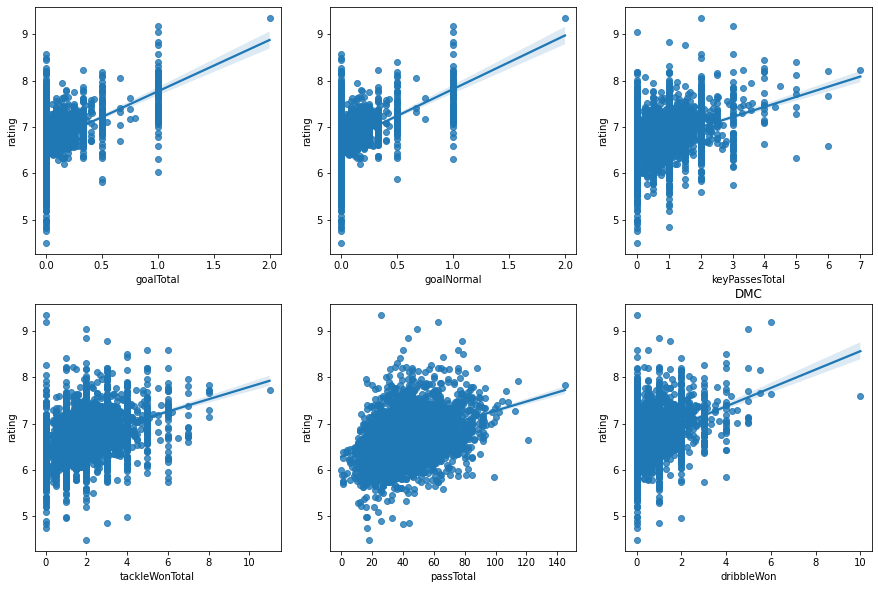

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_DMC, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_DMC, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_DMC, x='keyPassesTotal', y='rating')
plt.subplot(234)
sns.regplot(data= all_DMC, x='tackleWonTotal', y='rating')
plt.subplot(235)
sns.regplot(data= all_DMC, x='passTotal', y='rating')
plt.subplot(236)
sns.regplot(data= all_DMC, x='dribbleWon', y='rating')
plt.title('DMC')
plt.show()

**DR**

In [ ]:
# DR
# Column: rating, Correlation: 1.0
# Column: keyPassesTotal, Correlation: 0.4114957337364782
# Column: keyPassShort, Correlation: 0.37166921675379255
# Column: goalTotal, Correlation: 0.35865163356811325
# Column: goalNormal, Correlation: 0.350926429161781
# Column: dribbleWon, Correlation: 0.34304368631030463
# Column: tackleWonTotal, Correlation: 0.33731967633272886

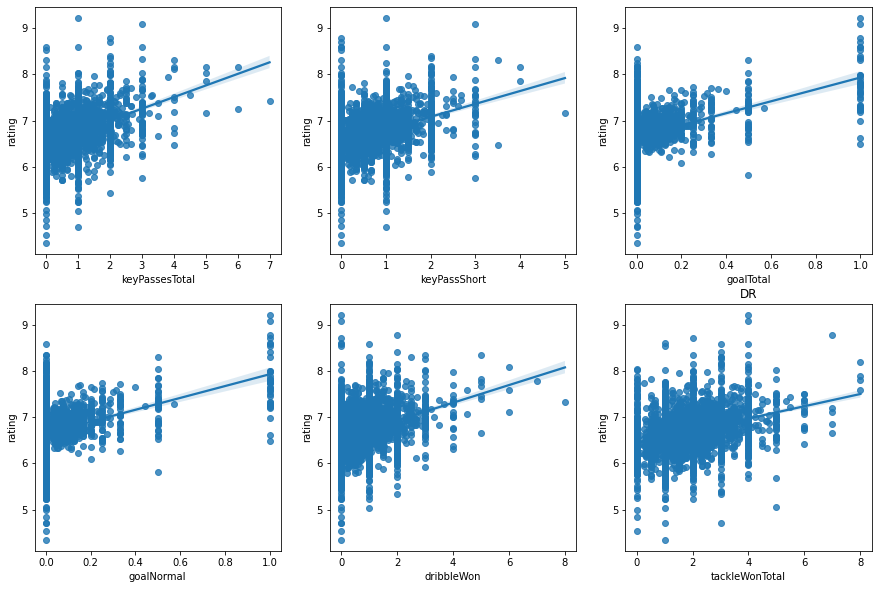

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_DR, x='keyPassesTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_DR, x='keyPassShort', y='rating')
plt.subplot(233)
sns.regplot(data= all_DR, x='goalTotal', y='rating')
plt.subplot(234)
sns.regplot(data= all_DR, x='goalNormal', y='rating')
plt.subplot(235)
sns.regplot(data= all_DR, x='dribbleWon', y='rating')
plt.subplot(236)
sns.regplot(data= all_DR, x='tackleWonTotal', y='rating')
plt.title('DR')
plt.show()

**FW**

In [ ]:
# FW
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.6985655177152836
# Column: goalNormal, Correlation: 0.6790949412181407
# Column: goalOpenPlay, Correlation: 0.6215090546194019
# Column: shotOnTarget, Correlation: 0.6119738169035753
# Column: goalPenaltyArea, Correlation: 0.6037495893265744
# Column: goalRightFoot, Correlation: 0.5277431040054245

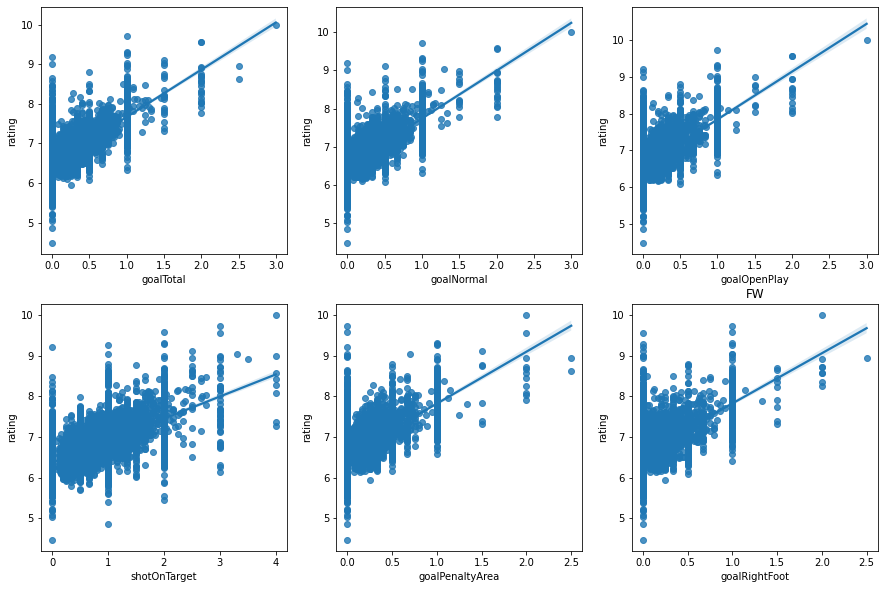

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_FW, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_FW, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_FW, x='goalOpenPlay', y='rating')
plt.subplot(234)
sns.regplot(data= all_FW, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_FW, x='goalPenaltyArea', y='rating')
plt.subplot(236)
sns.regplot(data= all_FW, x='goalRightFoot', y='rating')
plt.title('FW')
plt.show()

**GK**

In [ ]:
# GK
# Column: rating, Correlation: 1.0
# Column: saveTotal, Correlation: 0.513147188878454
# Column: savePenaltyArea, Correlation: 0.46117979935415265
# Column: saveObox, Correlation: 0.28459423237141607
# Column: duelAerialWon, Correlation: 0.17799469539824614
# Column: saveSixYardBox, Correlation: 0.16870572409502563
# Column: minsPlayed, Correlation: 0.16679811283363766

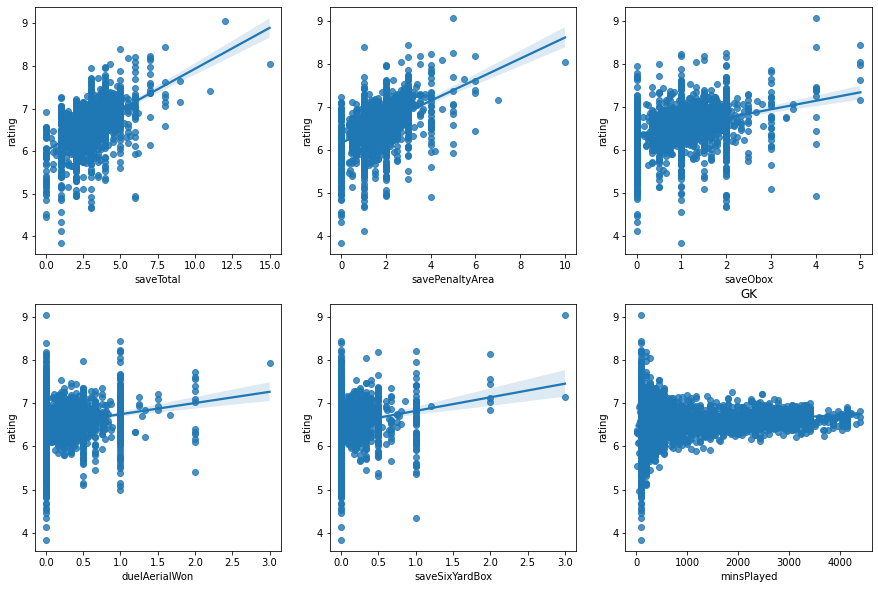

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_GK, x='saveTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_GK, x='savePenaltyArea', y='rating')
plt.subplot(233)
sns.regplot(data= all_GK, x='saveObox', y='rating')
plt.subplot(234)
sns.regplot(data= all_GK, x='duelAerialWon', y='rating')
plt.subplot(235)
sns.regplot(data= all_GK, x='saveSixYardBox', y='rating')
plt.subplot(236)
sns.regplot(data= all_GK, x='minsPlayed', y='rating')
plt.title('GK')
plt.show()

**MC**

In [ ]:
# MC
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.5068356234250135
# Column: goalNormal, Correlation: 0.4965685930150819
# Column: keyPassesTotal, Correlation: 0.46383111888106704
# Column: shotOnTarget, Correlation: 0.44884338252524175
# Column: goalOpenPlay, Correlation: 0.43664485058201213
# Column: keyPassShort, Correlation: 0.4339631133104915


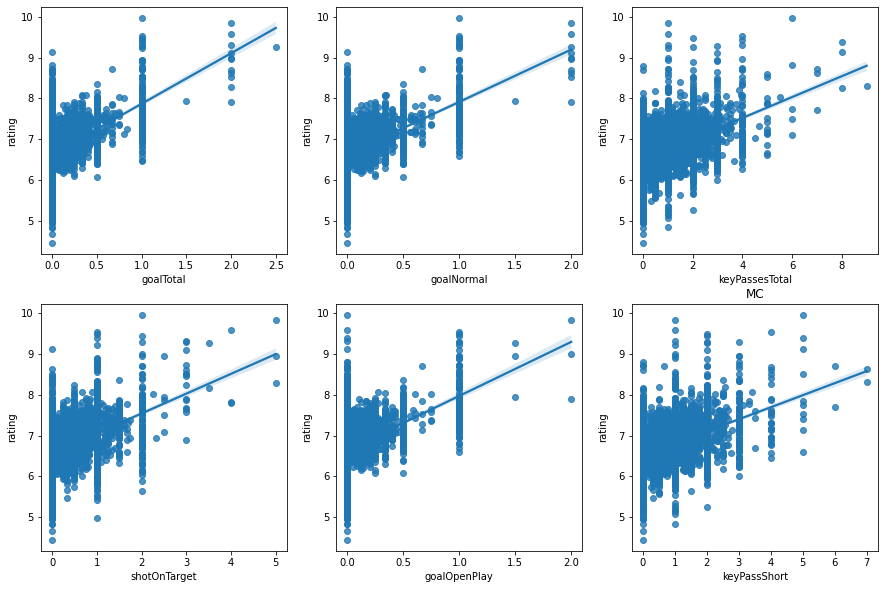

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_MC, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_MC, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_MC, x='keyPassesTotal', y='rating')
plt.subplot(234)
sns.regplot(data= all_MC, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_MC, x='goalOpenPlay', y='rating')
plt.subplot(236)
sns.regplot(data= all_MC, x='keyPassShort', y='rating')
plt.title('MC')
plt.show()

**ML**

In [ ]:
# ML
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.5499169911624866
# Column: goalNormal, Correlation: 0.5457208415405819
# Column: goalOpenPlay, Correlation: 0.5002172107613797
# Column: shotOnTarget, Correlation: 0.4839286744506611
# Column: goalPenaltyArea, Correlation: 0.4774902611356967
# Column: dribbleWon, Correlation: 0.45157594467190554

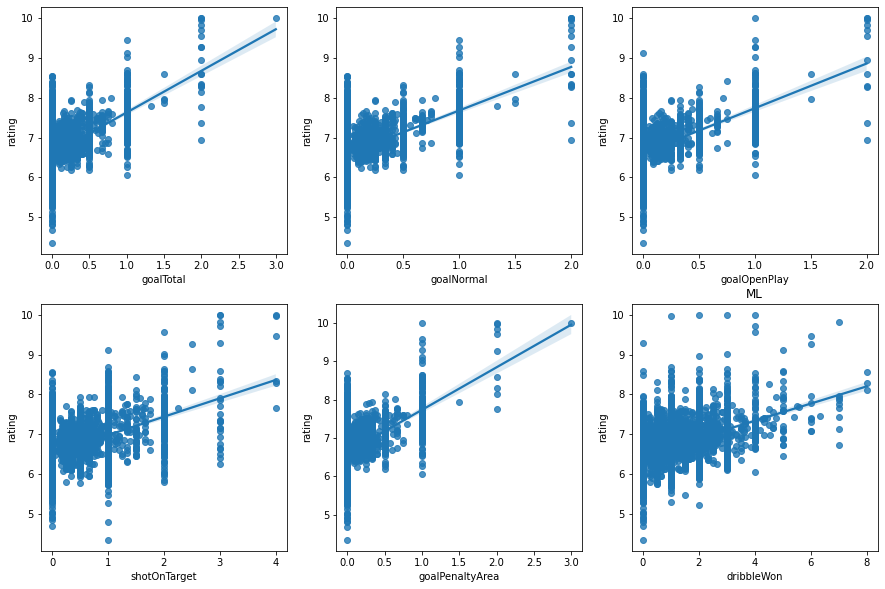

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_ML, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_ML, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_ML, x='goalOpenPlay', y='rating')
plt.subplot(234)
sns.regplot(data= all_ML, x='shotOnTarget', y='rating')
plt.subplot(235)
sns.regplot(data= all_ML, x='goalPenaltyArea', y='rating')
plt.subplot(236)
sns.regplot(data= all_ML, x='dribbleWon', y='rating')
plt.title('ML')
plt.show()

**MR**

In [ ]:
# MR
# Column: rating, Correlation: 1.0
# Column: goalTotal, Correlation: 0.5400828912960598
# Column: goalNormal, Correlation: 0.5250455806817687
# Column: shotOnTarget, Correlation: 0.4943964421964388
# Column: goalOpenPlay, Correlation: 0.47446907585029147
# Column: keyPassesTotal, Correlation: 0.46301166153930623
# Column: goalPenaltyArea, Correlation: 0.4353461033850458

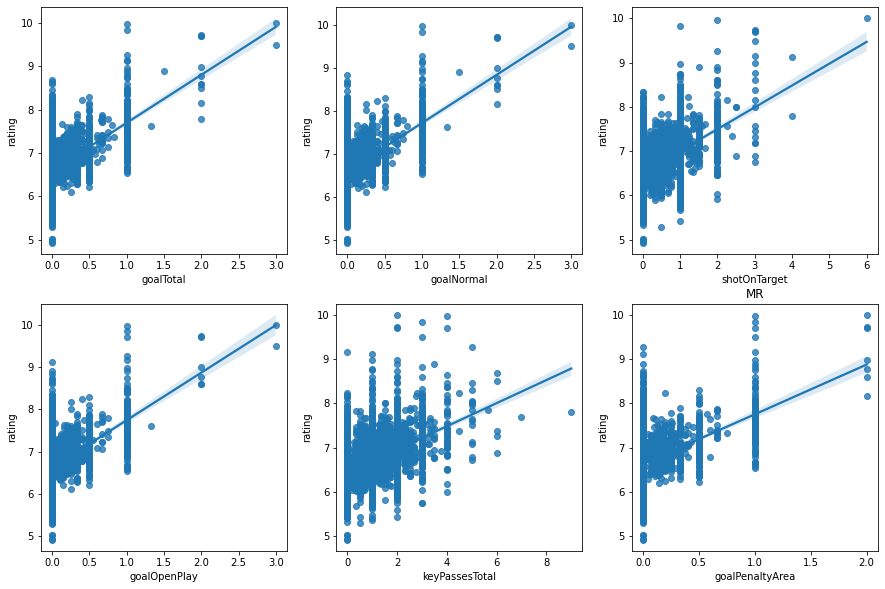

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(231)
sns.regplot(data= all_MR, x='goalTotal', y='rating')
plt.subplot(232)
sns.regplot(data= all_MR, x='goalNormal', y='rating')
plt.subplot(233)
sns.regplot(data= all_MR, x='shotOnTarget', y='rating')
plt.subplot(234)
sns.regplot(data= all_MR, x='goalOpenPlay', y='rating')
plt.subplot(235)
sns.regplot(data= all_MR, x='keyPassesTotal', y='rating')
plt.subplot(236)
sns.regplot(data= all_MR, x='goalPenaltyArea', y='rating')
plt.title('MR')
plt.show()

##**Training and Evaluation**

In [ ]:
#encoder positionCode
train_data = pd.get_dummies(train_data, columns=['positionCode'])
test_data = pd.get_dummies(test_data, columns=['positionCode'])

In [ ]:
train_data.head()

ID  minsPlayed    rating  duelAerialLost  duelAerialTotal  duelAerialWon  \
0  111          90  9.290000        1.000000         3.000000       2.000000   
1  112          86  8.490000        1.000000         2.000000       1.000000   
2  113         167  7.995000        0.000000         0.000000       0.000000   
3  114          90  7.830000        2.000000         2.000000       0.000000   
4  115        3087  7.787143        3.257143         5.428571       2.171429   

   assistCross  assistCorner  assistThroughball  assistFreekick  ...  \
0     0.000000           0.0                0.0        0.000000  ...   
1     0.000000           0.0                0.0        0.000000  ...   
2     0.000000           0.0                0.0        0.000000  ...   
3     0.000000           0.0                0.0        0.000000  ...   
4     0.028571           0.0                0.0        0.028571  ...   

   positionCode_AMR  positionCode_DC  positionCode_DL  positionCode_DMC  \
0                 0                0                0                 0   
1                 0                0                0                 0   
2                 0                0                0                 0   
3                 0                0                0                 0   
4                 0                0                0                 0   

   positionCode_DR  positionCode_FW  positionCode_GK  positionCode_MC  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   positionCode_ML  positionCode_MR  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 99 columns]

In [ ]:
test_data.head()

ID  minsPlayed    rating  duelAerialLost  duelAerialTotal  duelAerialWon  \
0   0         780  7.856667        1.444444         2.555556       1.111111   
1   1         540  7.616667        0.333333         0.500000       0.166667   
2   2         663  7.561250        2.000000         2.875000       0.875000   
3   3        3124  7.522857        2.200000         4.228571       2.028571   
4   4         841  7.476000        1.200000         1.300000       0.100000   

   assistCross  assistCorner  assistThroughball  assistFreekick  ...  \
0     0.000000           0.0           0.000000             0.0  ...   
1     0.000000           0.0           0.166667             0.0  ...   
2     0.000000           0.0           0.000000             0.0  ...   
3     0.028571           0.0           0.114286             0.0  ...   
4     0.100000           0.1           0.000000             0.0  ...   

   positionCode_AMR  positionCode_DC  positionCode_DL  positionCode_DMC  \
0                 0                0                0                 0   
1                 0                0                0                 0   
2                 0                0                0                 0   
3                 0                0                0                 0   
4                 0                0                0                 0   

   positionCode_DR  positionCode_FW  positionCode_GK  positionCode_MC  \
0                0                1                0                0   
1                0                1                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                1                0                0   

   positionCode_ML  positionCode_MR  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 99 columns]

In [ ]:
X_train = train_data.drop(columns=['positionGeneral', 'rating'])
y_train = train_data['rating']

X_test = test_data.drop(columns=['positionGeneral', 'rating'])
y_test = test_data['rating']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Random Forest regressor
regr = RandomForestRegressor(n_estimators=100,max_depth=8, bootstrap=True)
regr.fit(X_train, y_train)

# Make predictions on the test data
print('Position: {}'.format('all'))

y_pred_train = regr.predict(X_train)

# Estimate the train mean absolute error
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
print("Train MAE score: ", mae_train)

# Estimate the train mean squared error
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print("Train MSE score: ", mse_train)

# Estimate the train root mean squared error
rmse_train = np.sqrt(mse_train)
print("Train RMSE score: ", rmse_train)

#Estimate train R2
r2_train = metrics.r2_score(y_train, y_pred_train)
print("Train R2 score: ", r2_train)

y_pred_test = regr.predict(X_test)

# Estimate the test mean absolute error
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
print("Test MAE score: ", mae_test)

# Estimate the test mean squared error
mse_test = metrics.mean_squared_error(y_test, y_pred_test)
print("Test MSE score: ", mse_test)

# Estimate the test root mean squared error
rmse_test = np.sqrt(mse_test)
print("Test RMSE score: ", rmse_test)

#Estimate test R2
r2_test = metrics.r2_score(y_test, y_pred_test)
print("Test R2 score: ", r2_test)

Position: all
Train MAE score:  0.19597682096667104
Train MSE score:  0.07008233909398058
Train RMSE score:  0.2647306916358218
Train R2 score:  0.6993688238769271
Test MAE score:  0.20947409969968833
Test MSE score:  0.08217574264210872
Test RMSE score:  0.28666311698945285
Test R2 score:  0.6535635294945455
